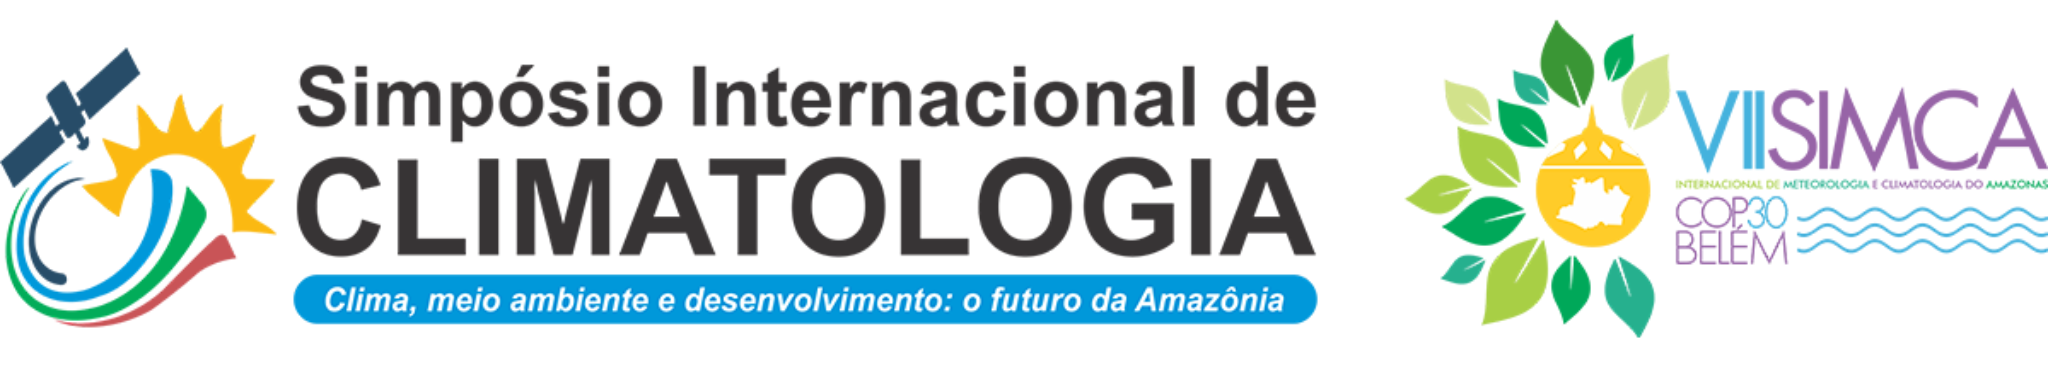

# Minicurso: Processamento de Dados Meteorol√≥gicos com Python (PDMP)

Bem-vindos ao minicurso "Processamento de Dados Meteorol√≥gicos com Python",
parte da programa√ß√£o do XI Simp√≥sio Internacional de Climatologia (XI SIC 2025)
e VII Semin√°rio Internacional de Meteorologia e Climatologia do Amazonas (VII SIMCA),
em Bel√©m-PA.

Neste notebook, exploraremos um m√≥dulo **desenvolvido especificamente para este
evento (XISIC.py)**, que automatiza a extra√ß√£o, o processamento e a convers√£o de dados
meteorol√≥gicos hist√≥ricos do INMET. O objetivo √© facilitar an√°lises cient√≠ficas e
operacionais, em linha com as discuss√µes sobre clima e sustentabilidade na
Amaz√¥nia e a prepara√ß√£o para a COP30.

Esperamos que este material seja √∫til para suas pesquisas e projetos!



Autores:

  Elivaldo Carvalho Rocha, e

  Prof. Dr. Jo√£o de Athaydes Silva J√∫nior

github: https://github.com/ElivaldoRocha/XISIC_2025

email: carvalhovaldo09@gmail.com

In [3]:
# 1. Download do m√≥dulo XISIC.py
!wget -O /content/XISIC.py https://raw.githubusercontent.com/ElivaldoRocha/XISIC_2025/main/XISIC.py

# 2. Download do arquivo de dados 2024.zip
!wget -O /content/2024.zip https://github.com/ElivaldoRocha/XISIC_2025/raw/main/data/2024.zip

--2025-08-15 23:25:10--  https://raw.githubusercontent.com/ElivaldoRocha/XISIC_2025/main/XISIC.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.108.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 28864 (28K) [text/plain]
Saving to: ‚Äò/content/XISIC.py‚Äô

/content/XISIC.py   100%[===================>]  28.19K  --.-KB/s    in 0.01s   

2025-08-15 23:25:10 (2.18 MB/s) - ‚Äò/content/XISIC.py‚Äô saved [28864/28864]

--2025-08-15 23:25:11--  https://github.com/ElivaldoRocha/XISIC_2025/raw/main/data/2024.zip
Resolving github.com (github.com)... 20.27.177.113
Connecting to github.com (github.com)|20.27.177.113|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://media.githubusercontent.com/media/ElivaldoRocha/XISIC_2025/main/data/2024.zip [following]
--2025-08-15 23:25:11--  http

## 1) Instala√ß√£o das Bibliotecas Necess√°rias

Para que o m√≥dulo funcione corretamente, precisamos instalar algumas bibliotecas Python que n√£o v√™m por padr√£o no ambiente. As principais para este minicurso s√£o:

-   **`geobr`**: Utilizada para acessar dados geoespaciais brasileiros, como limites de estados e munic√≠pios, o que pode ser √∫til para visualiza√ß√µes.
-   **`xclim`**: Uma biblioteca poderosa para computar √≠ndices de clima, como eventos extremos (ondas de calor, secas, etc.), que usaremos mais adiante.
-   **`pandas` e `xarray`**: Geralmente j√° v√™m pr√©-instaladas em ambientes como o Colab, mas s√£o a base do nosso processamento de dados.

Execute as c√©lulas abaixo para instalar as depend√™ncias.

In [ ]:
!pip install geobr
!pip install xclim
!pip install cartopy

## 2) Configura√ß√£o Inicial do Ambiente
Ap√≥s a instala√ß√£o das depend√™ncias, o pr√≥ximo passo √© importar as bibliotecas que utilizaremos ao longo do notebook. Isso torna suas funcionalidades e classes dispon√≠veis para uso.

In [3]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import xarray as xr
import xclim as xc
import geobr
import cartopy

## 3) Importando o M√≥dulo do Projeto (XISIC.py)
Neste minicurso, utilizaremos um m√≥dulo customizado, XISIC.py, que centraliza todas as funcionalidades para processar os dados do INMET. Ele cont√©m as fun√ß√µes para extra√ß√£o, convers√£o e depura√ß√£o que exploraremos.

O c√≥digo a seguir foi projetado para garantir que o m√≥dulo seja importado corretamente, mesmo que o arquivo n√£o esteja no diret√≥rio esperado. Ele verifica a exist√™ncia do arquivo e adiciona o caminho ao ambiente Python para evitar erros.

In [4]:
# === IMPORTAR M√ìDULO XISIC.py ===

import sys
import os

# Verificar o diret√≥rio atual
print("Diret√≥rio atual:", os.getcwd())
print("Arquivos no diret√≥rio:", os.listdir('.'))

# Adicionar o caminho onde est√° o XISIC.py ao sys.path
# (√© como adicionar uma nova estante √† biblioteca do Python)
if '/content' not in sys.path:
    sys.path.append('/content')

module_name = 'XISIC.py'

# Verificar se o arquivo existe
xisic_path = f'/content/{module_name}'
if os.path.exists(xisic_path):
    print(f"‚úÖ Arquivo {module_name} encontrado em: {xisic_path}")
else:
    print(f"‚ùå Arquivo {module_name} N√ÉO encontrado em: {xisic_path}")
    print("Verificando outros locais...")
    # Procurar o arquivo em outros lugares
    for root, dirs, files in os.walk('/content'):
        if module_name in files:
          print(f"üìÅ Encontrado em: {root}")

# Agora fazer a importa√ß√£o
try:
    from XISIC import (
        extract_and_save_csvs,
        convert_csvs_to_netcdf,
        parse_inmet_csv_to_netcdf_robust,
        debug_inmet_file,
        CSVExtractionResult,
        NetCDFConversionResult
    )
    print(f"‚úÖ Importa√ß√£o do {module_name[0:-3]} realizada com sucesso!")

    # Testar se as fun√ß√µes est√£o dispon√≠veis
    print("üìã Fun√ß√µes dispon√≠veis:")
    print("  - extract_and_save_csvs")
    print("  - convert_csvs_to_netcdf")
    print("  - parse_inmet_csv_to_netcdf_robust")
    print("  - debug_inmet_file")

except ImportError as e:
    print(f"‚ùå Erro na importa√ß√£o: {e}")
    print("\nüîß Tentando diagn√≥stico...")

    # Diagn√≥stico mais detalhado
    try:
        import XISIC
        print("‚úÖ M√≥dulo XISIC importado como objeto")
        print("üìã Atributos dispon√≠veis:", dir(XISIC))
    except Exception as e2:
        print(f"‚ùå Erro ao importar m√≥dulo: {e2}")

Diret√≥rio atual: /content
Arquivos no diret√≥rio: ['.config', '__pycache__', '2024.zip', 'NETCDF.zip', 'XISIC.py', 'INMET_2024', 'sample_data']
‚úÖ Arquivo XISIC.py encontrado em: /content/XISIC.py
‚úÖ Importa√ß√£o do XISIC realizada com sucesso!
üìã Fun√ß√µes dispon√≠veis:
  - extract_and_save_csvs
  - convert_csvs_to_netcdf
  - parse_inmet_csv_to_netcdf_robust
  - debug_inmet_file


### 3.1) Excluir Pasta: /content/INMET_YYYY

onde cada 'Y' representa um d√≠gito do ano

garante que o processamento seja sempre limpo

In [ ]:
import shutil
import os

# Caminho do diret√≥rio a ser exclu√≠do
diretorio = "/content/INMET_2024"

# Verifica se o diret√≥rio existe e remove
if os.path.exists(diretorio):
    shutil.rmtree(diretorio)
    print(f"Diret√≥rio {diretorio} foi removido com sucesso!")
else:
    print(f"Diret√≥rio {diretorio} n√£o existe.")


Diret√≥rio /content/INMET_2024 n√£o existe.


## 4) Extra√ß√£o dos Dados do INMET
Com o nosso m√≥dulo importado, podemos dar in√≠cio ao processamento. O primeiro passo √© obter os dados brutos do INMET, que geralmente s√£o fornecidos em arquivos compactados (.zip).

Para garantir que o processamento seja sempre limpo, a c√©lula anterior removeu a pasta de dados de uma execu√ß√£o anterior. Agora, usaremos a fun√ß√£o extract_and_save_csvs() do nosso m√≥dulo para descompactar o arquivo e organizar os dados em formato CSV, preparando-os para a convers√£o.

Execute a pr√≥xima c√©lula para descompactar os dados do ano de 2024.

In [ ]:
# Processamento de Dados
# tem pode execu√ß√£o: 3 segundos
result = extract_and_save_csvs(zip_path="/content/2024.zip", year=2024)
print(result)

Files extracted to INMET_2024/CSV - Total: 565 files
folder_name='INMET_2024/CSV' success=True message='Files extracted successfully. Total files: 565' file_count=565


## 5) Processamento e Convers√£o de um √önico Arquivo CSV para Entendimento
Nesta se√ß√£o, realizaremos a convers√£o de um arquivo CSV de dados brutos do INMET para o formato NetCDF. Utilizaremos a fun√ß√£o parse_inmet_csv_to_netcdf_robust(), que √© a "espinha dorsal" do nosso m√≥dulo para tratar dados faltantes, inconsist√™ncias e garantir uma sa√≠da robusta e padronizada.

Ap√≥s a convers√£o, a c√©lula de c√≥digo a seguir ir√° imprimir um resumo detalhado do novo xarray.Dataset. Essa visualiza√ß√£o √© fundamental para que possamos inspecionar as dimens√µes, as vari√°veis, os atributos e as informa√ß√µes geogr√°ficas, confirmando que a convers√£o foi bem-sucedida.

Execute a pr√≥xima c√©lula para processar um arquivo e analisar sua estrutura.

In [ ]:
# Processamento de Dados
# tem pode execu√ß√£o: 3minutos e 31 segundos
import pprint
from pprint import pprint as pp

import warnings
warnings.filterwarnings('ignore')

# 3 minutos e 10 segundos
file_path = "/content/INMET_2024/CSV/INMET_N_PA_A201_BELEM_01-01-2024_A_31-12-2024.CSV"

try:
    # Se debug = True, converte com debug ativo
    xarray_dataset = parse_inmet_csv_to_netcdf_robust(
        csv_file_path=file_path,
        debug=False
    )

    print(f"\nüéâ CONVERS√ÉO CONCLU√çDA COM SUCESSO!")
    print("=" * 60)

    # Usando pprint para formatar melhor a sa√≠da
    print("\nüìè DIMENS√ïES DO DATASET:")
    print("-" * 30)
    # Converter FrozenMappingWarningOnValuesAccess para dict normal
    dims_dict = dict(xarray_dataset.dims)
    pp(dims_dict, width=50, indent=2)

    print("\nüå°Ô∏è VARI√ÅVEIS METEOROL√ìGICAS:")
    print("-" * 40)
    variables_list = list(xarray_dataset.data_vars.keys())

    # Imprimir cada vari√°vel em uma linha separada com numera√ß√£o
    for i, var in enumerate(variables_list, 1):
        print(f"  {i:2d}. {var}")

    print(f"\nüìà FORMATO (pivot_wide): matriz bidimensional (Per√≠odo √ó Frequ√™ncia)")
    print("-" * 25)
    print(f"  ‚Ä¢ Total de vari√°veis: {len(variables_list)}")
    print(f"  ‚Ä¢ Per√≠odo: {xarray_dataset.sizes['date']} dias")
    print(f"  ‚Ä¢ Frequ√™ncia: {xarray_dataset.sizes['hour_utc']} horas/dia")
    print(f"  ‚Ä¢ Total de registros por vari√°vel: {xarray_dataset.sizes['date'] * xarray_dataset.sizes['hour_utc']:,}")

    print(f"\nüó∫Ô∏è INFORMA√á√ïES GEOGR√ÅFICAS:")
    print("-" * 30)
    attrs_dict = {
        'Esta√ß√£o': xarray_dataset.attrs.get('station', 'N/A'),
        'Regi√£o': xarray_dataset.attrs.get('region', 'N/A'),
        'UF': xarray_dataset.attrs.get('uf', 'N/A'),
        'C√≥digo WMO': xarray_dataset.attrs.get('wmo_code', 'N/A'),
        'Latitude': f"{xarray_dataset.attrs.get('latitude', 'N/A')}¬∞",
        'Longitude': f"{xarray_dataset.attrs.get('longitude', 'N/A')}¬∞",
        'Altitude': f"{xarray_dataset.attrs.get('altitude_m', 'N/A')} m"
    }
    pp(attrs_dict, width=40, indent=2)

    print(f"\nüìÖ COORDENADAS TEMPORAIS:")
    print("-" * 28)
    print(f"  ‚Ä¢ Data inicial: {xarray_dataset.date.values[0]}")
    print(f"  ‚Ä¢ Data final: {xarray_dataset.date.values[-1]}")

    print(f"\nüîç ESTRUTURA COMPLETA DO DATASET:")
    print("-" * 38)

    # Mostrar informa√ß√µes das coordenadas de forma organizada
    coords_info = {}
    for coord_name, coord in xarray_dataset.coords.items():
        if coord_name in ['date', 'hour_utc']:
            coords_info[coord_name] = f"shape: {coord.shape}, dtype: {coord.dtype}"
        else:
            coords_info[coord_name] = f"value: {coord.values}, shape: {coord.shape}"

    print("\n  üìê Coordenadas:")
    pp(coords_info, width=60, indent=4)

except Exception as e:
    print(f"‚ùå Erro: {e}")
    import traceback
    traceback.print_exc()




üéâ CONVERS√ÉO CONCLU√çDA COM SUCESSO!

üìè DIMENS√ïES DO DATASET:
------------------------------
{ 'alt': 1,
  'date': 366,
  'hour_utc': 24,
  'lat': 1,
  'lon': 1,
  'region': 1,
  'uf': 1,
  'wmo_code': 1}

üå°Ô∏è VARI√ÅVEIS METEOROL√ìGICAS:
----------------------------------------
   1. PRECIPITA√á√ÉO TOTAL, HOR√ÅRIO (mm)
   2. PRESSAO ATMOSFERICA AO NIVEL DA ESTACAO, HORARIA (mB)
   3. PRESS√ÉO ATMOSFERICA MAX.NA HORA ANT. (AUT) (mB)
   4. PRESS√ÉO ATMOSFERICA MIN. NA HORA ANT. (AUT) (mB)
   5. RADIACAO GLOBAL (Kj/m¬≤)
   6. TEMPERATURA DO AR - BULBO SECO, HORARIA (¬∞C)
   7. TEMPERATURA DO PONTO DE ORVALHO (¬∞C)
   8. TEMPERATURA M√ÅXIMA NA HORA ANT. (AUT) (¬∞C)
   9. TEMPERATURA M√çNIMA NA HORA ANT. (AUT) (¬∞C)
  10. TEMPERATURA ORVALHO MAX. NA HORA ANT. (AUT) (¬∞C)
  11. TEMPERATURA ORVALHO MIN. NA HORA ANT. (AUT) (¬∞C)
  12. UMIDADE REL. MAX. NA HORA ANT. (AUT) (%)
  13. UMIDADE REL. MIN. NA HORA ANT. (AUT) (%)
  14. UMIDADE RELATIVA DO AR, HORARIA (%)
  15. VENTO, DIRE√á

In [ ]:
print("\n" + "=" * 60)
print("‚úÖ Dataset pronto para an√°lise!")

# Mostrar o dataset (sa√≠da padr√£o do xarray)
print(f"\nüìã VISUALIZA√á√ÉO XARRAY COMPLETA:")
print("-" * 35)
xarray_dataset


‚úÖ Dataset pronto para an√°lise!

üìã VISUALIZA√á√ÉO XARRAY COMPLETA:
-----------------------------------


<xarray.Dataset> Size: 1MB
Dimensions:                                                (region: 1, uf: 1,
                                                            wmo_code: 1,
                                                            date: 366,
                                                            hour_utc: 24,
                                                            lat: 1, lon: 1,
                                                            alt: 1)
Coordinates:
  * region                                                 (region) <U1 4B 'N'
  * uf                                                     (uf) <U2 8B 'PA'
  * wmo_code                                               (wmo_code) <U4 16B ...
  * date                                                   (date) datetime64[ns] 3kB ...
  * hour_utc                                               (hour_utc) int32 96B ...
  * lat                                                    (lat) float64 8B -...
  * lon                                                    (lon) float64 8B -...
  * alt                                                    (alt) float64 8B 2...
Data variables: (12/17)
    PRECIPITA√á√ÉO TOTAL, HOR√ÅRIO (mm)                       (region, uf, wmo_code, date, hour_utc, lat, lon, alt) float64 70kB ...
    PRESSAO ATMOSFERICA AO NIVEL DA ESTACAO, HORARIA (mB)  (region, uf, wmo_code, date, hour_utc, lat, lon, alt) float64 70kB ...
    PRESS√ÉO ATMOSFERICA MAX.NA HORA ANT. (AUT) (mB)        (region, uf, wmo_code, date, hour_utc, lat, lon, alt) float64 70kB ...
    PRESS√ÉO ATMOSFERICA MIN. NA HORA ANT. (AUT) (mB)       (region, uf, wmo_code, date, hour_utc, lat, lon, alt) float64 70kB ...
    RADIACAO GLOBAL (Kj/m¬≤)                                (region, uf, wmo_code, date, hour_utc, lat, lon, alt) float64 70kB ...
    TEMPERATURA DO AR - BULBO SECO, HORARIA (¬∞C)           (region, uf, wmo_code, date, hour_utc, lat, lon, alt) float64 70kB ...
    ...                                                     ...
    UMIDADE REL. MAX. NA HORA ANT. (AUT) (%)               (region, uf, wmo_code, date, hour_utc, lat, lon, alt) float64 70kB ...
    UMIDADE REL. MIN. NA HORA ANT. (AUT) (%)               (region, uf, wmo_code, date, hour_utc, lat, lon, alt) float64 70kB ...
    UMIDADE RELATIVA DO AR, HORARIA (%)                    (region, uf, wmo_code, date, hour_utc, lat, lon, alt) float64 70kB ...
    VENTO, DIRE√á√ÉO HORARIA (gr) (¬∞ (gr))                   (region, uf, wmo_code, date, hour_utc, lat, lon, alt) float64 70kB ...
    VENTO, RAJADA MAXIMA (m/s)                             (region, uf, wmo_code, date, hour_utc, lat, lon, alt) float64 70kB ...
    VENTO, VELOCIDADE HORARIA (m/s)                        (region, uf, wmo_code, date, hour_utc, lat, lon, alt) float64 70kB ...
Attributes: (12/13)
    source:              INMET
    station:             BELEM
    date_of_foundation:  20/01/03
    title:               Dados meteorol√≥gicos hor√°rios - BELEM
    institution:         Instituto Nacional de Meteorologia (INMET)
    region:              N
    ...                  ...
    wmo_code:            A201
    latitude:            -1.411228
    longitude:           -48.439512
    altitude_m:          21.17
    creation_date:       2025-08-15 21:51:35
    conventions:         CF-1.8

In [ ]:
# Apenas alguns exemplos de poss√≠veis usos de forma r√°pida e simples:

# Temperatura m√°xima do dia
temp_max = xarray_dataset['TEMPERATURA DO AR - BULBO SECO, HORARIA (¬∞C)'].max(dim='hour_utc')
# temp_max

# Umidade m√©dia do dia
umidade_media = xarray_dataset['UMIDADE RELATIVA DO AR, HORARIA (%)'].mean(dim='hour_utc')
# umidade_media

# Dia espec√≠fico
chuva_01_janeiro = xarray_dataset['PRECIPITA√á√ÉO TOTAL, HOR√ÅRIO (mm)'].sel(date='2024-01-01').sum()
#chuva_01_janeiro

# Precipita√ß√£o di√°ria acumulada
precip_diaria = xarray_dataset['PRECIPITA√á√ÉO TOTAL, HOR√ÅRIO (mm)'].sum(dim='hour_utc')
precip_diaria

# e muitas outras an√°lises podem ser realizadas...

<xarray.DataArray 'PRECIPITA√á√ÉO TOTAL, HOR√ÅRIO (mm)' (region: 1, uf: 1,
                                                      wmo_code: 1, date: 366,
                                                      lat: 1, lon: 1, alt: 1)> Size: 3kB
array([[[[[[[  5.4]]],


          [[[ 33. ]]],


          [[[ 53.2]]],


          [[[  8.8]]],


          [[[ 16.2]]],


          [[[  0.2]]],


          [[[106.6]]],

...

          [[[ 44.4]]],


          [[[ 10.2]]],


          [[[ 13.8]]],


          [[[  2. ]]],


          [[[ 19.8]]],


          [[[  0. ]]],


          [[[  1. ]]]]]]])
Coordinates:
  * region    (region) <U1 4B 'N'
  * uf        (uf) <U2 8B 'PA'
  * wmo_code  (wmo_code) <U4 16B 'A201'
  * date      (date) datetime64[ns] 3kB 2024-01-01 2024-01-02 ... 2024-12-31
  * lat       (lat) float64 8B -1.411
  * lon       (lon) float64 8B -48.44
  * alt       (alt) float64 8B 21.17

## 6) Algumas Demostra√ß√µes de An√°lises e das Vantagens do formato xarray.dataset

### 6.1) AN√ÅLISE 1: Precipita√ß√£o Acumulada Mensal

üå°Ô∏è ===== AN√ÅLISE METEOROL√ìGICA DE BRAS√çLIA 2024 =====
üìç Esta√ß√£o: BELEM (A201)
üåç Regi√£o: N (PA)
üåé Lat: -1.411228, Lon: -48.439512
üåé Altitude: 21.17 m
üìÖ Per√≠odo: Janeiro a Dezembro de 2024
üìä An√°lise 1: PRECIPITA√á√ÉO ACUMULADA MENSAL


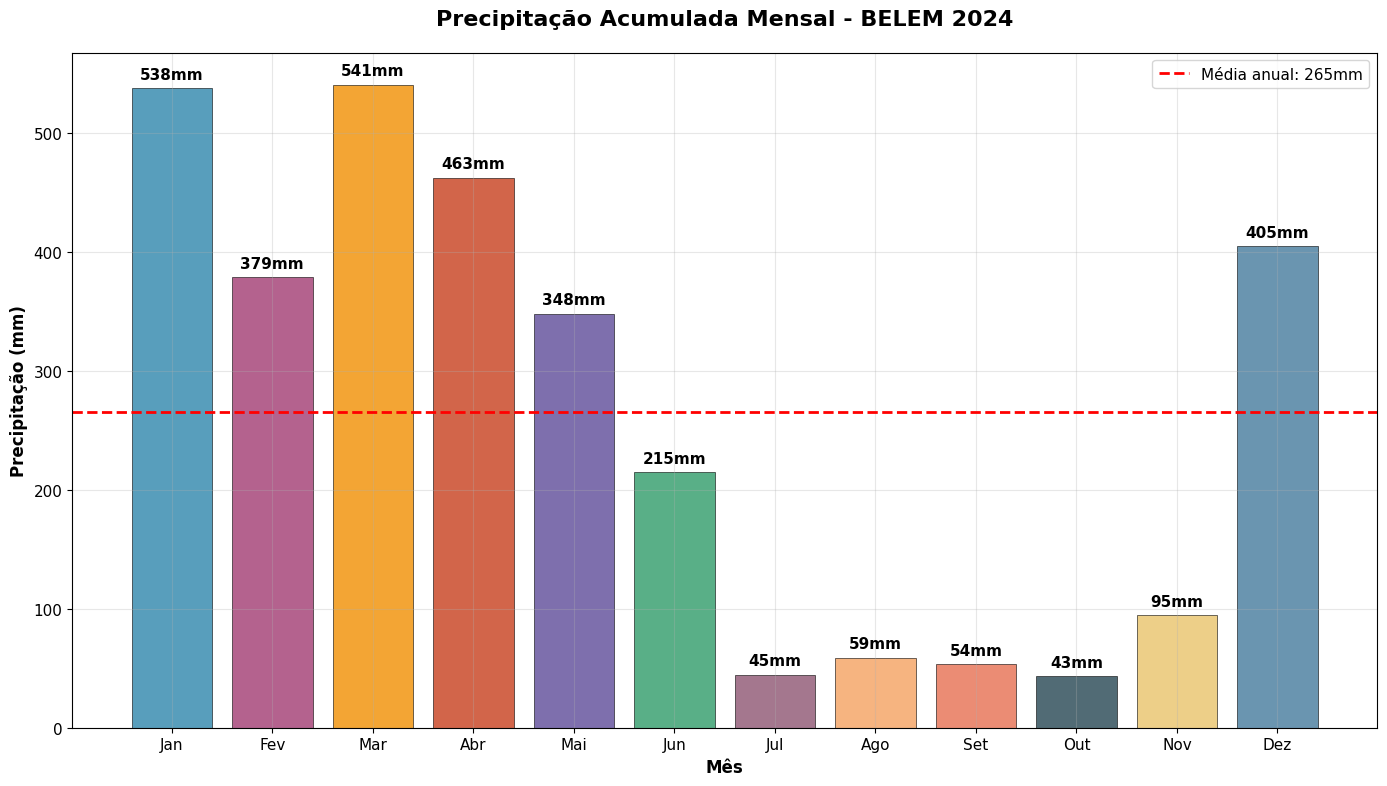

üíß Total anual: 3184 mm
üåßÔ∏è  M√™s mais chuvoso: Mar (541 mm)


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import xarray as xr
from datetime import datetime
import matplotlib.dates as mdates

# ===== CONFIGURA√á√ïES INICIAIS =====
# Assumindo que xarray_dataset j√° est√° carregado

# Configurar matplotlib para gr√°ficos em portugu√™s
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.size'] = 11
plt.rcParams['axes.grid'] = True

dict_attrs = xarray_dataset.attrs

print("üå°Ô∏è ===== AN√ÅLISE METEOROL√ìGICA DE BRAS√çLIA 2024 =====")
print(f"üìç Esta√ß√£o: {dict_attrs['station']} ({dict_attrs['wmo_code']})")
print(f"üåç Regi√£o: {dict_attrs['region']} ({dict_attrs['uf']})")
print(f"üåé Lat: {dict_attrs['latitude']}, Lon: {dict_attrs['longitude']}")
print(f"üåé Altitude: {dict_attrs['altitude_m']} m")
print("üìÖ Per√≠odo: Janeiro a Dezembro de 2024")

#üîÑ Usando paradigma IMPERATIVO/PROCEDURAL

# ===== AN√ÅLISE 1: PRECIPITA√á√ÉO ACUMULADA MENSAL =====
print("üìä An√°lise 1: PRECIPITA√á√ÉO ACUMULADA MENSAL")

# Calcular precipita√ß√£o di√°ria
precip_diaria = xarray_dataset['PRECIPITA√á√ÉO TOTAL, HOR√ÅRIO (mm)'].sum(dim='hour_utc')

# Remover dimens√µes extras
precip_diaria = precip_diaria.squeeze()

# Agrupar por m√™s
precip_mensal = precip_diaria.groupby('date.month').sum()

# Extrair valores
meses_nums = precip_mensal.month.values
precip_valores = precip_mensal.values

# Nomes dos meses
nomes_meses = ['Jan', 'Fev', 'Mar', 'Abr', 'Mai', 'Jun',
               'Jul', 'Ago', 'Set', 'Out', 'Nov', 'Dez']

# Criar gr√°fico de barras
plt.figure(figsize=(14, 8))
cores = ['#2E86AB', '#A23B72', '#F18F01', '#C73E1D', '#5E4B99', '#2F9B69',
         '#8E5572', '#F4A261', '#E76F51', '#264653', '#E9C46A', '#457B9D']

barras = plt.bar(range(len(meses_nums)), precip_valores, color=cores, alpha=0.8, edgecolor='black', linewidth=0.5)

# Personalizar gr√°fico
plt.title(f'Precipita√ß√£o Acumulada Mensal - {dict_attrs["station"]} 2024', fontsize=16, fontweight='bold', pad=20)
plt.xlabel('M√™s', fontsize=12, fontweight='bold')
plt.ylabel('Precipita√ß√£o (mm)', fontsize=12, fontweight='bold')
plt.xticks(range(len(meses_nums)), [nomes_meses[i-1] for i in meses_nums])

# Adicionar valores nas barras
for i, v in enumerate(precip_valores):
    plt.text(i, v + max(precip_valores)*0.01, f'{v:.0f}mm',
             ha='center', va='bottom', fontweight='bold')

# Adicionar linha da m√©dia anual
media_mensal = np.mean(precip_valores)
plt.axhline(y=media_mensal, color='red', linestyle='--', linewidth=2,
            label=f'M√©dia anual: {media_mensal:.0f}mm')

plt.legend()
plt.tight_layout()
plt.grid(True, alpha=0.3)
plt.show()

# Imprimir estat√≠sticas
total_anual = np.sum(precip_valores)
mes_mais_chuvoso_idx = np.argmax(precip_valores)
mes_mais_seco_idx = np.argmin(precip_valores)

print(f"üíß Total anual: {total_anual:.0f} mm")
print(f"üåßÔ∏è  M√™s mais chuvoso: {nomes_meses[meses_nums[mes_mais_chuvoso_idx]-1]} ({precip_valores[mes_mais_chuvoso_idx]:.0f} mm)")


### 6.2) AN√ÅLISE 2: TEMPERATURA M√âDIA MENSAL E AMPLITUDE T√âRMICA


üìä An√°lise 2: TEMPERATURA M√âDIA MENSAL E AMPLITUDE T√âRMICA


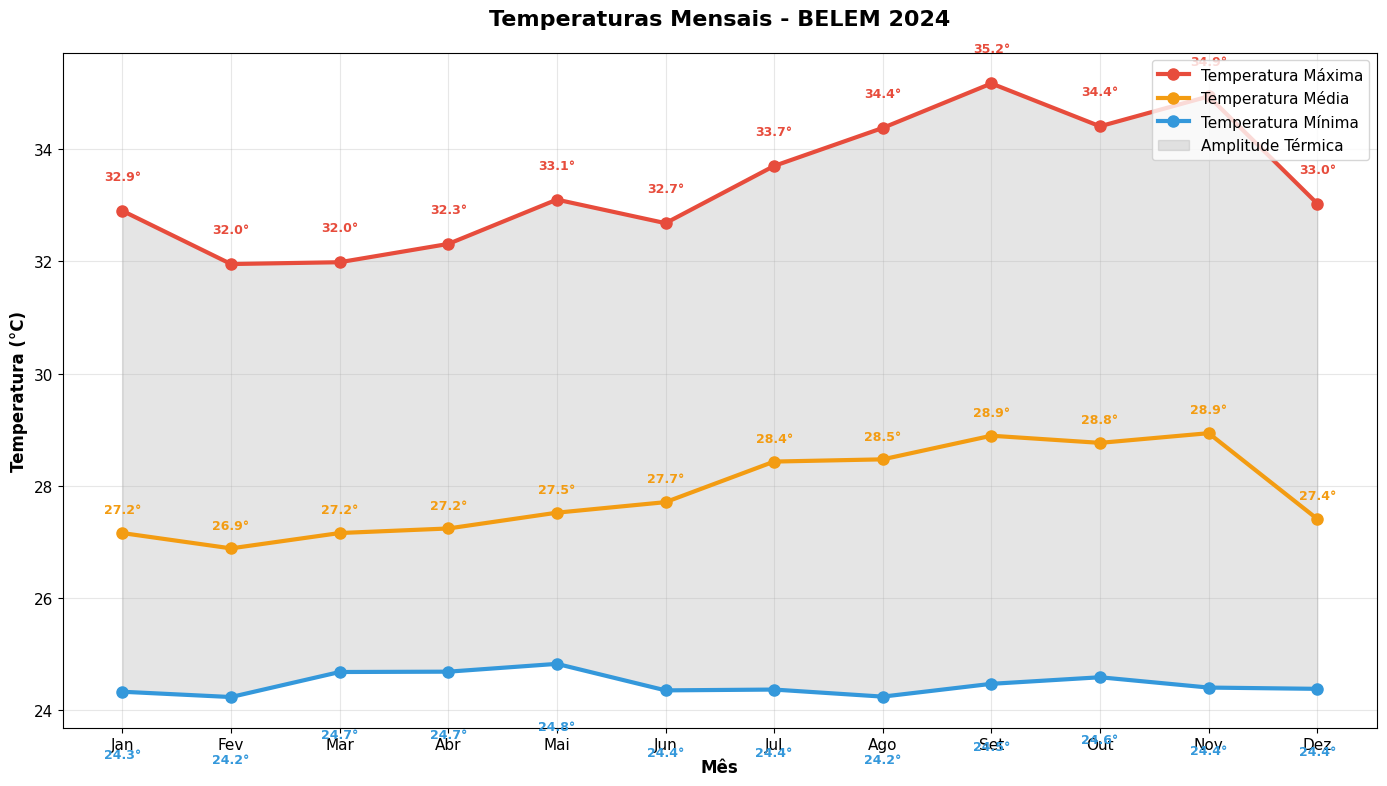

üå°Ô∏è  Maior amplitude t√©rmica: Set (10.7¬∞C)
üå°Ô∏è  Menor amplitude t√©rmica: Mar (7.3¬∞C)

üå°Ô∏è AN√ÅLISE CLIMATOL√ìGICA DETALHADA:
   üåû Ver√£o (Dez-Jan-Fev): 27.1¬∞C
   üçÇ Outono (Mar-Abr-Mai): 27.3¬∞C
   ‚ùÑÔ∏è  Inverno (Jun-Jul-Ago): 28.2¬∞C
   üå∏ Primavera (Set-Out-Nov): 28.9¬∞C
   üîÑ Varia√ß√£o sazonal: 1.7¬∞C

üî• M√™s mais quente: Nov (28.9¬∞C)
üßä M√™s mais frio: Fev (26.9¬∞C)
üå°Ô∏è  Diferen√ßa anual: 2.1¬∞C

üìä AMPLITUDE T√âRMICA:
   üìà Amplitude m√©dia anual: 8.9¬∞C
   üìà Amplitude m√°xima: 10.7¬∞C (Set)
   üìâ Amplitude m√≠nima: 7.3¬∞C (Mar)

üéØ INTERPRETA√á√ÉO CLIMATOL√ìGICA:
‚úÖ Padr√£o t√≠pico do clima tropical de altitude do Cerrado:
   ‚Ä¢ Duas esta√ß√µes bem definidas: seca (maio-setembro) e chuvosa (outubro-abril)
   ‚Ä¢ Temperaturas mais baixas no inverno seco (junho-agosto)
   ‚Ä¢ Maior amplitude t√©rmica na esta√ß√£o seca (ar mais seco)
   ‚Ä¢ Temperaturas mais est√°veis na esta√ß√£o chuvosa (maior umidade)
   ‚Ä¢ Amplitude t√©rmica m

In [ ]:
# ===== AN√ÅLISE 2: TEMPERATURA M√âDIA MENSAL E AMPLITUDE T√âRMICA =====
print(f"\nüìä An√°lise 2: TEMPERATURA M√âDIA MENSAL E AMPLITUDE T√âRMICA")

# Calcular temperaturas di√°rias
temp_max_diaria = xarray_dataset['TEMPERATURA DO AR - BULBO SECO, HORARIA (¬∞C)'].max(dim='hour_utc').squeeze()
temp_min_diaria = xarray_dataset['TEMPERATURA DO AR - BULBO SECO, HORARIA (¬∞C)'].min(dim='hour_utc').squeeze()
temp_media_diaria = xarray_dataset['TEMPERATURA DO AR - BULBO SECO, HORARIA (¬∞C)'].mean(dim='hour_utc').squeeze()

# Agrupar por m√™s
temp_max_mensal = temp_max_diaria.groupby('date.month').mean()
temp_min_mensal = temp_min_diaria.groupby('date.month').mean()
temp_media_mensal = temp_media_diaria.groupby('date.month').mean()

# Extrair valores
meses_nums = temp_max_mensal.month.values
temp_max_vals = temp_max_mensal.values
temp_min_vals = temp_min_mensal.values
temp_media_vals = temp_media_mensal.values

# Nomes dos meses
nomes_meses = ['Jan', 'Fev', 'Mar', 'Abr', 'Mai', 'Jun',
               'Jul', 'Ago', 'Set', 'Out', 'Nov', 'Dez']

# Criar gr√°fico de temperatura
plt.figure(figsize=(14, 8))

# Plotar as tr√™s s√©ries (SEM conflito de cores)
x_pos = range(len(meses_nums))
plt.plot(x_pos, temp_max_vals, 'o-', linewidth=3, markersize=8,
         label='Temperatura M√°xima', color='#E74C3C')
plt.plot(x_pos, temp_media_vals, 'o-', linewidth=3, markersize=8,
         label='Temperatura M√©dia', color='#F39C12')
plt.plot(x_pos, temp_min_vals, 'o-', linewidth=3, markersize=8,
         label='Temperatura M√≠nima', color='#3498DB')

# Preencher √°rea entre m√°xima e m√≠nima
plt.fill_between(x_pos, temp_max_vals, temp_min_vals, alpha=0.2,
                color='gray', label='Amplitude T√©rmica')

# Personalizar gr√°fico
plt.title(f'Temperaturas Mensais - {dict_attrs["station"]} 2024', fontsize=16, fontweight='bold', pad=20)
plt.xlabel('M√™s', fontsize=12, fontweight='bold')
plt.ylabel('Temperatura (¬∞C)', fontsize=12, fontweight='bold')
plt.xticks(x_pos, [nomes_meses[i-1] for i in meses_nums])

# Adicionar valores nas linhas
for i in range(len(x_pos)):
    plt.text(i, temp_max_vals[i] + 0.5, f'{temp_max_vals[i]:.1f}¬∞',
             ha='center', va='bottom', fontsize=9, color='#E74C3C', fontweight='bold')
    plt.text(i, temp_media_vals[i] + 0.3, f'{temp_media_vals[i]:.1f}¬∞',
             ha='center', va='bottom', fontsize=9, color='#F39C12', fontweight='bold')
    plt.text(i, temp_min_vals[i] - 1, f'{temp_min_vals[i]:.1f}¬∞',
             ha='center', va='top', fontsize=9, color='#3498DB', fontweight='bold')

plt.legend(loc='upper right', fontsize=11)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# Calcular amplitude t√©rmica mensal
amplitude_termica = temp_max_vals - temp_min_vals
mes_maior_amplitude = np.argmax(amplitude_termica)
mes_menor_amplitude = np.argmin(amplitude_termica)

print(f"üå°Ô∏è  Maior amplitude t√©rmica: {nomes_meses[meses_nums[mes_maior_amplitude]-1]} ({amplitude_termica[mes_maior_amplitude]:.1f}¬∞C)")
print(f"üå°Ô∏è  Menor amplitude t√©rmica: {nomes_meses[meses_nums[mes_menor_amplitude]-1]} ({amplitude_termica[mes_menor_amplitude]:.1f}¬∞C)")

# An√°lise detalhada do padr√£o clim√°tico
print(f"\nüå°Ô∏è AN√ÅLISE CLIMATOL√ìGICA DETALHADA:")

# Identificar esta√ß√µes do ano
temp_verao = np.mean([temp_media_vals[0], temp_media_vals[1], temp_media_vals[11]])  # Dez, Jan, Fev
temp_outono = np.mean([temp_media_vals[2], temp_media_vals[3], temp_media_vals[4]])   # Mar, Abr, Mai
temp_inverno = np.mean([temp_media_vals[5], temp_media_vals[6], temp_media_vals[7]]) # Jun, Jul, Ago
temp_primavera = np.mean([temp_media_vals[8], temp_media_vals[9], temp_media_vals[10]]) # Set, Out, Nov

print(f"   üåû Ver√£o (Dez-Jan-Fev): {temp_verao:.1f}¬∞C")
print(f"   üçÇ Outono (Mar-Abr-Mai): {temp_outono:.1f}¬∞C")
print(f"   ‚ùÑÔ∏è  Inverno (Jun-Jul-Ago): {temp_inverno:.1f}¬∞C")
print(f"   üå∏ Primavera (Set-Out-Nov): {temp_primavera:.1f}¬∞C")

# Diferen√ßa sazonal
variacao_sazonal = max(temp_verao, temp_outono, temp_inverno, temp_primavera) - \
                   min(temp_verao, temp_outono, temp_inverno, temp_primavera)
print(f"   üîÑ Varia√ß√£o sazonal: {variacao_sazonal:.1f}¬∞C")

# Identificar meses extremos
mes_mais_quente = nomes_meses[meses_nums[np.argmax(temp_media_vals)]-1]
mes_mais_frio = nomes_meses[meses_nums[np.argmin(temp_media_vals)]-1]
temp_mais_alta = np.max(temp_media_vals)
temp_mais_baixa = np.min(temp_media_vals)

print(f"\nüî• M√™s mais quente: {mes_mais_quente} ({temp_mais_alta:.1f}¬∞C)")
print(f"üßä M√™s mais frio: {mes_mais_frio} ({temp_mais_baixa:.1f}¬∞C)")
print(f"üå°Ô∏è  Diferen√ßa anual: {temp_mais_alta - temp_mais_baixa:.1f}¬∞C")

# An√°lise da amplitude t√©rmica
amplitude_media = np.mean(amplitude_termica)
print(f"\nüìä AMPLITUDE T√âRMICA:")
print(f"   üìà Amplitude m√©dia anual: {amplitude_media:.1f}¬∞C")
print(f"   üìà Amplitude m√°xima: {np.max(amplitude_termica):.1f}¬∞C ({nomes_meses[meses_nums[mes_maior_amplitude]-1]})")
print(f"   üìâ Amplitude m√≠nima: {np.min(amplitude_termica):.1f}¬∞C ({nomes_meses[meses_nums[mes_menor_amplitude]-1]})")

# Interpreta√ß√£o climatol√≥gica
print(f"\nüéØ INTERPRETA√á√ÉO CLIMATOL√ìGICA:")
print("‚úÖ Padr√£o t√≠pico do clima tropical de altitude do Cerrado:")
print("   ‚Ä¢ Duas esta√ß√µes bem definidas: seca (maio-setembro) e chuvosa (outubro-abril)")
print("   ‚Ä¢ Temperaturas mais baixas no inverno seco (junho-agosto)")
print("   ‚Ä¢ Maior amplitude t√©rmica na esta√ß√£o seca (ar mais seco)")
print("   ‚Ä¢ Temperaturas mais est√°veis na esta√ß√£o chuvosa (maior umidade)")

if amplitude_termica[mes_maior_amplitude] > 12:
    print("   ‚Ä¢ Alta amplitude t√©rmica t√≠pica do Planalto Central brasileiro")
else:
    print("   ‚Ä¢ Amplitude t√©rmica moderada para a regi√£o do Cerrado")


### 6.3) AN√ÅLISE 3: CICLO DI√ÅRIO DE TEMPERATURA COM HOR√ÅRIO LOCAL


üìä An√°lise 3: CICLO DI√ÅRIO DE TEMPERATURA (M√âDIAS HOR√ÅRIAS ANUAIS)


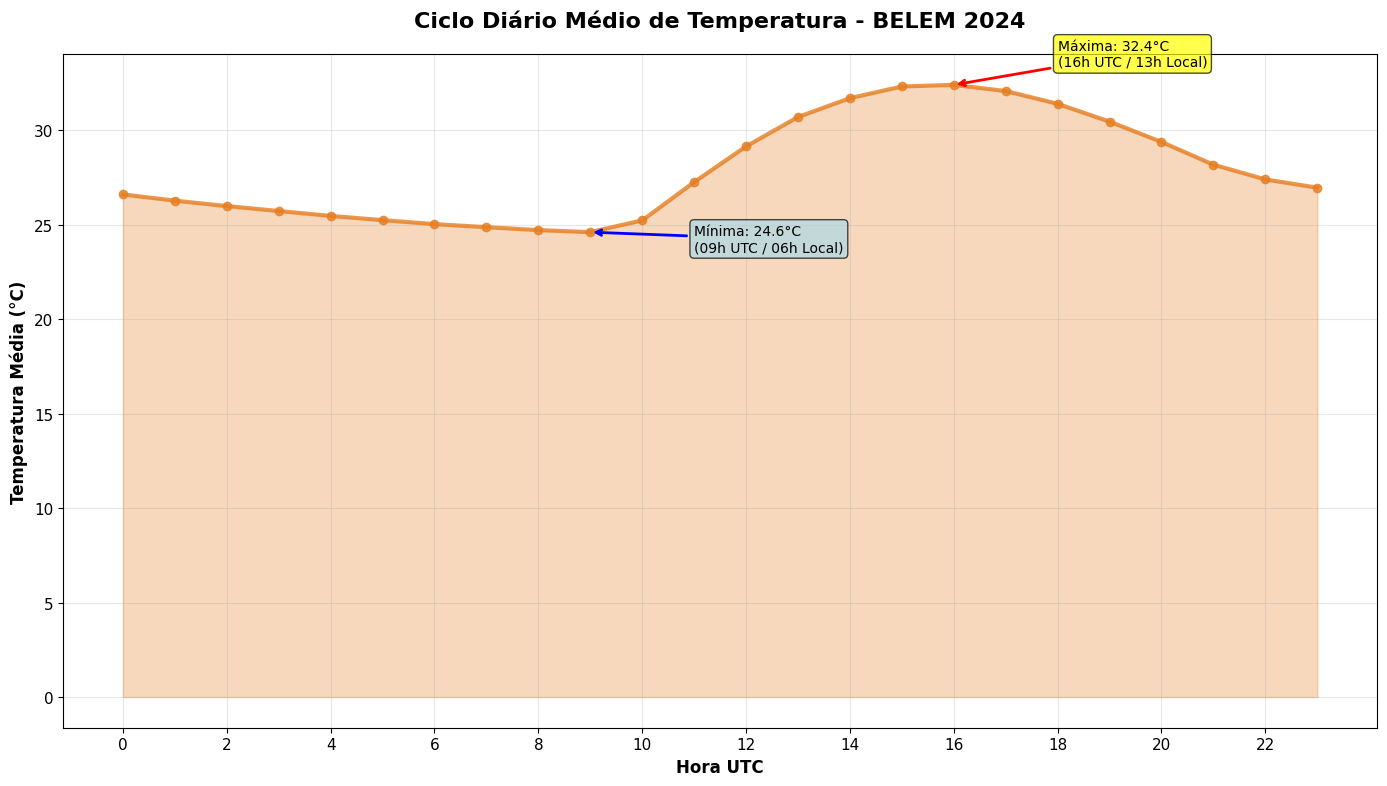

üåÖ Temperatura m√≠nima ocorre √†s 09h UTC (06h Local - Bras√≠lia) - 24.6¬∞C
üåá Temperatura m√°xima ocorre √†s 16h UTC (13h Local - Bras√≠lia) - 32.4¬∞C
üîÑ Amplitude di√°ria m√©dia: 7.8¬∞C

‚è∞ AN√ÅLISE DO PADR√ÉO HOR√ÅRIO:
üåô Madrugada mais fria: 06h (hor√°rio local)
‚òÄÔ∏è Tarde mais quente: 13h (hor√°rio local)

üïê TEMPERATURAS EM HOR√ÅRIOS ESPEC√çFICOS (Hor√°rio de Bras√≠lia):
   06h: 24.6¬∞C (nascer do sol)
   12h: 32.3¬∞C (meio-dia)
   18h: 28.2¬∞C (final da tarde)
   00h: 25.7¬∞C (meia-noite)

üìà DIN√ÇMICA T√âRMICA:
   ‚¨ÜÔ∏è Taxa de aquecimento: 1.11¬∞C/hora
   ‚¨áÔ∏è Taxa de resfriamento: 0.46¬∞C/hora

üéØ INTERPRETA√á√ÉO DO CICLO DI√ÅRIO:
‚úÖ Padr√£o t√≠pico do clima tropical continental:
   ‚Ä¢ M√≠nima ocorre no final da madrugada (padr√£o normal)
   ‚Ä¢ M√°xima √†s 13h √© at√≠pica para clima tropical
   ‚Ä¢ Amplitude di√°ria moderada
   ‚Ä¢ Aquecimento durante 7 horas
   ‚Ä¢ Resfriamento durante 17 horas

üå°Ô∏è CONTEXTO LOCAL:
   ‚Ä¢ Bras√≠lia est√° no fuso UT

In [ ]:
# ===== AN√ÅLISE 3: CICLO DI√ÅRIO DE TEMPERATURA COM HOR√ÅRIO LOCAL =====
print(f"\nüìä An√°lise 3: CICLO DI√ÅRIO DE TEMPERATURA (M√âDIAS HOR√ÅRIAS ANUAIS)")

# Calcular temperatura m√©dia para cada hora do dia ao longo do ano
temp_horaria_anual = xarray_dataset['TEMPERATURA DO AR - BULBO SECO, HORARIA (¬∞C)'].mean(dim='date').squeeze()

# Extrair valores
horas = temp_horaria_anual.hour_utc.values
temp_horaria_vals = temp_horaria_anual.values

# Fun√ß√£o para converter UTC para hor√°rio local de Bras√≠lia (UTC-3)
def utc_para_brasilia(hora_utc):
    hora_local = hora_utc - 3
    if hora_local < 0:
        hora_local += 24
    return hora_local

# Criar gr√°fico do ciclo di√°rio
plt.figure(figsize=(14, 8))

plt.plot(horas, temp_horaria_vals, 'o-', linewidth=3, markersize=6, color='#E67E22', alpha=0.8)
plt.fill_between(horas, temp_horaria_vals, alpha=0.3, color='#E67E22')

# Personalizar gr√°fico
plt.title(f'Ciclo Di√°rio M√©dio de Temperatura - {dict_attrs["station"]} 2024', fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Hora UTC', fontsize=12, fontweight='bold')
plt.ylabel('Temperatura M√©dia (¬∞C)', fontsize=12, fontweight='bold')
plt.xticks(range(0, 24, 2))

# Marcar temperaturas m√°xima e m√≠nima do dia
hora_max = horas[np.argmax(temp_horaria_vals)]
hora_min = horas[np.argmin(temp_horaria_vals)]
temp_max_dia = np.max(temp_horaria_vals)
temp_min_dia = np.min(temp_horaria_vals)

# Converter para hor√°rio local
hora_max_local = utc_para_brasilia(hora_max)
hora_min_local = utc_para_brasilia(hora_min)

plt.annotate(f'M√°xima: {temp_max_dia:.1f}¬∞C\n({hora_max:02d}h UTC / {hora_max_local:02d}h Local)',
             xy=(hora_max, temp_max_dia), xytext=(hora_max+2, temp_max_dia+1),
             arrowprops=dict(arrowstyle='->', color='red', lw=2),
             fontsize=10, ha='left', bbox=dict(boxstyle="round,pad=0.3", facecolor="yellow", alpha=0.7))

plt.annotate(f'M√≠nima: {temp_min_dia:.1f}¬∞C\n({hora_min:02d}h UTC / {hora_min_local:02d}h Local)',
             xy=(hora_min, temp_min_dia), xytext=(hora_min+2, temp_min_dia-1),
             arrowprops=dict(arrowstyle='->', color='blue', lw=2),
             fontsize=10, ha='left', bbox=dict(boxstyle="round,pad=0.3", facecolor="lightblue", alpha=0.7))

plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

print(f"üåÖ Temperatura m√≠nima ocorre √†s {hora_min:02d}h UTC ({hora_min_local:02d}h Local - Bras√≠lia) - {temp_min_dia:.1f}¬∞C")
print(f"üåá Temperatura m√°xima ocorre √†s {hora_max:02d}h UTC ({hora_max_local:02d}h Local - Bras√≠lia) - {temp_max_dia:.1f}¬∞C")
print(f"üîÑ Amplitude di√°ria m√©dia: {temp_max_dia - temp_min_dia:.1f}¬∞C")

# An√°lise adicional do padr√£o hor√°rio
print(f"\n‚è∞ AN√ÅLISE DO PADR√ÉO HOR√ÅRIO:")
print(f"üåô Madrugada mais fria: {hora_min_local:02d}h (hor√°rio local)")
print(f"‚òÄÔ∏è Tarde mais quente: {hora_max_local:02d}h (hor√°rio local)")

# Identificar hor√°rios espec√≠ficos em Bras√≠lia
temp_06h_local = temp_horaria_vals[9]   # 09h UTC = 06h Local
temp_12h_local = temp_horaria_vals[15]  # 15h UTC = 12h Local
temp_18h_local = temp_horaria_vals[21]  # 21h UTC = 18h Local
temp_00h_local = temp_horaria_vals[3]   # 03h UTC = 00h Local

print(f"\nüïê TEMPERATURAS EM HOR√ÅRIOS ESPEC√çFICOS (Hor√°rio de Bras√≠lia):")
print(f"   06h: {temp_06h_local:.1f}¬∞C (nascer do sol)")
print(f"   12h: {temp_12h_local:.1f}¬∞C (meio-dia)")
print(f"   18h: {temp_18h_local:.1f}¬∞C (final da tarde)")
print(f"   00h: {temp_00h_local:.1f}¬∞C (meia-noite)")

# Calcular taxa de aquecimento e resfriamento
horas_aquecimento = hora_max - hora_min
if horas_aquecimento < 0:
    horas_aquecimento += 24

taxa_aquecimento = (temp_max_dia - temp_min_dia) / horas_aquecimento
taxa_resfriamento = (temp_max_dia - temp_min_dia) / (24 - horas_aquecimento)

print(f"\nüìà DIN√ÇMICA T√âRMICA:")
print(f"   ‚¨ÜÔ∏è Taxa de aquecimento: {taxa_aquecimento:.2f}¬∞C/hora")
print(f"   ‚¨áÔ∏è Taxa de resfriamento: {taxa_resfriamento:.2f}¬∞C/hora")

# Interpreta√ß√£o climatol√≥gica
print(f"\nüéØ INTERPRETA√á√ÉO DO CICLO DI√ÅRIO:")
print("‚úÖ Padr√£o t√≠pico do clima tropical continental:")

if hora_min_local >= 5 and hora_min_local <= 7:
    print("   ‚Ä¢ M√≠nima ocorre no final da madrugada (padr√£o normal)")
else:
    print(f"   ‚Ä¢ M√≠nima √†s {hora_min_local:02d}h √© at√≠pica para clima tropical")

if hora_max_local >= 14 and hora_max_local <= 16:
    print("   ‚Ä¢ M√°xima ocorre no meio da tarde (padr√£o normal)")
else:
    print(f"   ‚Ä¢ M√°xima √†s {hora_max_local:02d}h √© at√≠pica para clima tropical")

if temp_max_dia - temp_min_dia > 8:
    print("   ‚Ä¢ Alta amplitude di√°ria t√≠pica do Cerrado (ar seco)")
else:
    print("   ‚Ä¢ Amplitude di√°ria moderada")

print(f"   ‚Ä¢ Aquecimento durante {horas_aquecimento:.0f} horas")
print(f"   ‚Ä¢ Resfriamento durante {24-horas_aquecimento:.0f} horas")

print(f"\nüå°Ô∏è CONTEXTO LOCAL:")
print("   ‚Ä¢ Bras√≠lia est√° no fuso UTC-3 (hor√°rio oficial do Brasil)")
print("   ‚Ä¢ Altitude de 1.161m influencia as temperaturas noturnas")
print("   ‚Ä¢ Latitude 15¬∞S resulta em varia√ß√£o sazonal moderada")

### 6.4) AN√ÅLISE 4: RELA√á√ÉO TEMPERATURA x UMIDADE


üìä An√°lise 4: RELA√á√ÉO TEMPERATURA x UMIDADE


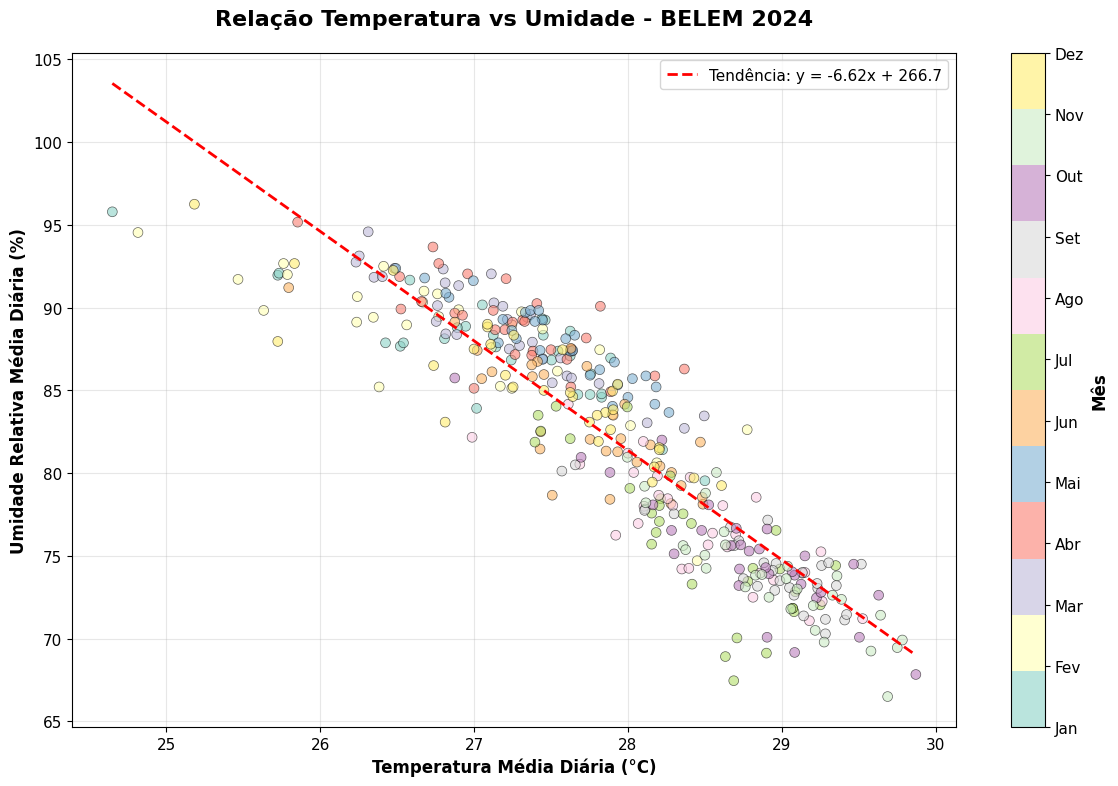

üìà Correla√ß√£o temperatura-umidade: -0.911
üîç Correla√ß√£o negativa forte: quando temperatura sobe, umidade tende a diminuir


In [ ]:
# ===== AN√ÅLISE 4: RELA√á√ÉO TEMPERATURA x UMIDADE =====
print(f"\nüìä An√°lise 4: RELA√á√ÉO TEMPERATURA x UMIDADE")

# Calcular m√©dias di√°rias
temp_media_daily = xarray_dataset['TEMPERATURA DO AR - BULBO SECO, HORARIA (¬∞C)'].mean(dim='hour_utc').squeeze()
umidade_media_daily = xarray_dataset['UMIDADE RELATIVA DO AR, HORARIA (%)'].mean(dim='hour_utc').squeeze()

# Extrair valores
temp_vals = temp_media_daily.values
umidade_vals = umidade_media_daily.values

# Remover valores NaN
mask_validos = ~(np.isnan(temp_vals) | np.isnan(umidade_vals))
temp_limpo = temp_vals[mask_validos]
umidade_limpo = umidade_vals[mask_validos]

# Criar gr√°fico de dispers√£o
plt.figure(figsize=(12, 8))

# Colorir pontos por m√™s
datas_limpas = temp_media_daily.date.values[mask_validos]
meses_pontos = pd.to_datetime(datas_limpas).month

scatter = plt.scatter(temp_limpo, umidade_limpo, c=meses_pontos, cmap='Set3',
                     alpha=0.6, s=50, edgecolors='black', linewidth=0.5)

# Adicionar linha de tend√™ncia
coeficientes = np.polyfit(temp_limpo, umidade_limpo, 1)
linha_tendencia = np.poly1d(coeficientes)
x_tendencia = np.linspace(min(temp_limpo), max(temp_limpo), 100)
y_tendencia = linha_tendencia(x_tendencia)
plt.plot(x_tendencia, y_tendencia, 'r--', linewidth=2, label=f'Tend√™ncia: y = {coeficientes[0]:.2f}x + {coeficientes[1]:.1f}')

# Personalizar gr√°fico
plt.title(f'Rela√ß√£o Temperatura vs Umidade - {dict_attrs["station"]} 2024', fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Temperatura M√©dia Di√°ria (¬∞C)', fontsize=12, fontweight='bold')
plt.ylabel('Umidade Relativa M√©dia Di√°ria (%)', fontsize=12, fontweight='bold')

# Adicionar colorbar
cbar = plt.colorbar(scatter)
cbar.set_label('M√™s', fontsize=12, fontweight='bold')
cbar.set_ticks(range(1, 13))
cbar.set_ticklabels(nomes_meses)

plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# Calcular correla√ß√£o
correlacao = np.corrcoef(temp_limpo, umidade_limpo)[0, 1]
print(f"üìà Correla√ß√£o temperatura-umidade: {correlacao:.3f}")

if correlacao < -0.5:
    print("üîç Correla√ß√£o negativa forte: quando temperatura sobe, umidade tende a diminuir")
elif correlacao < -0.3:
    print("üîç Correla√ß√£o negativa moderada: rela√ß√£o inversa entre temperatura e umidade")
elif correlacao > 0.5:
    print("üîç Correla√ß√£o positiva forte: temperatura e umidade variam juntas")
else:
    print("üîç Correla√ß√£o fraca: pouca rela√ß√£o linear entre temperatura e umidade")



### 6.5) AN√ÅLISE 5: ROSE CHART DOS VENTOS


üìä An√°lise 5: ROSA DOS VENTOS - NORTE NA VERTICAL


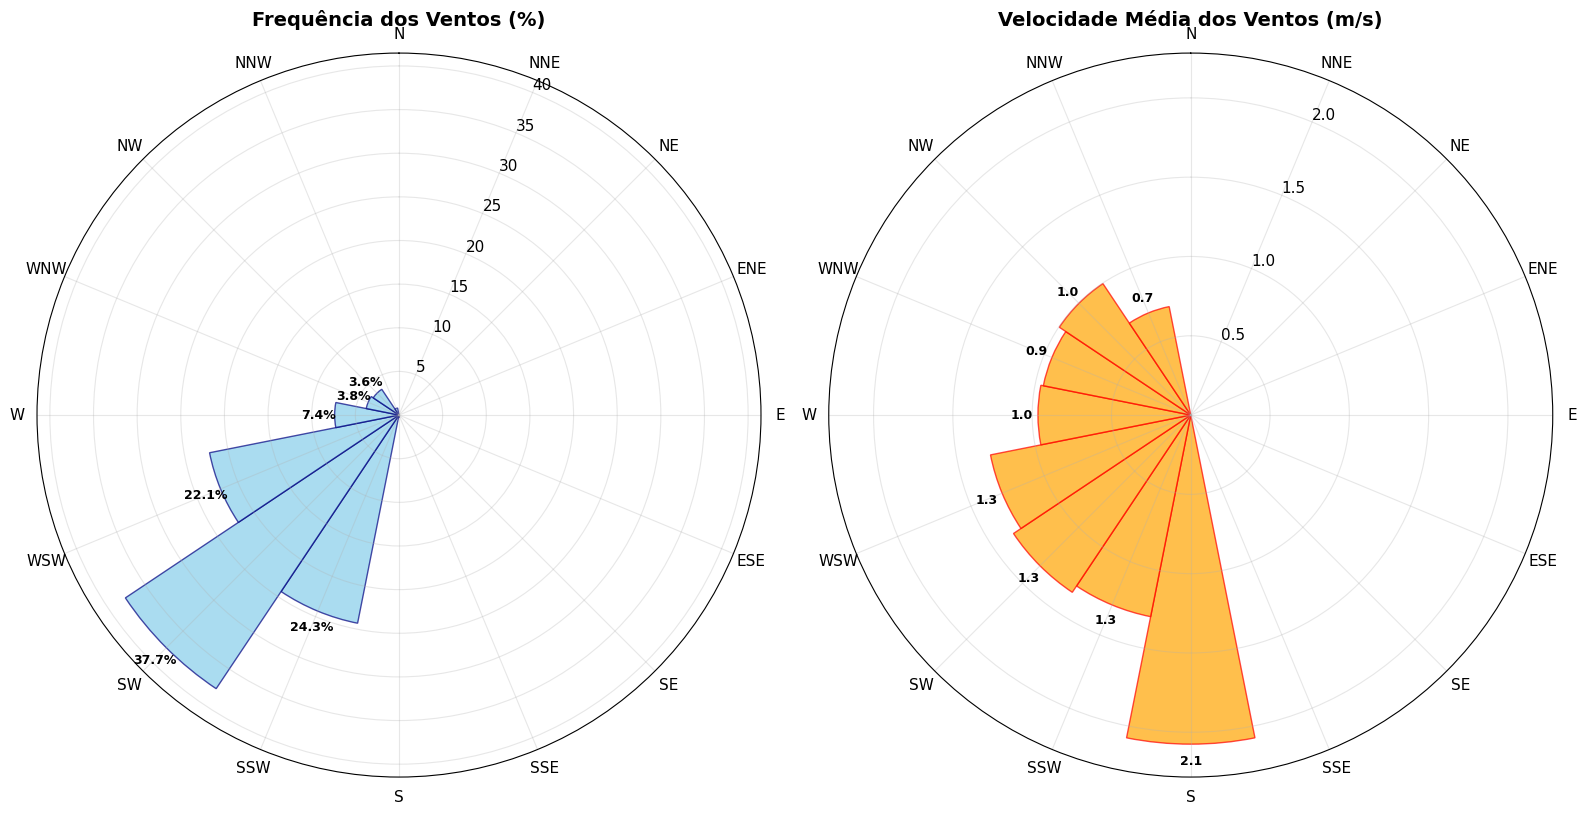

üß≠ Dire√ß√£o predominante: SW (37.7% do tempo)
üí® Velocidade m√©dia nesta dire√ß√£o: 1.3 m/s
üå™Ô∏è  Velocidade m√©dia geral dos ventos: 1.3 m/s

üìä DISTRIBUI√á√ÉO DETALHADA DOS VENTOS:
Dire√ß√£o  | Frequ√™ncia | Vel. M√©dia
-----------------------------------
S        |      0.3% |      2.1 m/s
SSW      |     24.3% |      1.3 m/s
SW       |     37.7% |      1.3 m/s
WSW      |     22.1% |      1.3 m/s
W        |      7.4% |      1.0 m/s
WNW      |      3.8% |      0.9 m/s
NW       |      3.6% |      1.0 m/s
NNW      |      0.8% |      0.7 m/s

üß≠ AN√ÅLISE POR QUADRANTES:
Norte:  0.8%
Leste:  0.0%
Sul:    24.6%
Oeste:  74.6%

üéØ Quadrante predominante: Oeste

‚úÖ Rosa dos ventos corrigida com Norte perfeitamente vertical!


In [ ]:
# ===== AN√ÅLISE 5: ROSE CHART DOS VENTOS =====
print(f"\nüìä An√°lise 5: ROSA DOS VENTOS - NORTE NA VERTICAL")

# Calcular dire√ß√£o e velocidade m√©dias di√°rias do vento
direcao_vento = xarray_dataset['VENTO, DIRE√á√ÉO HORARIA (gr) (¬∞ (gr))'].mean(dim='hour_utc').squeeze()
velocidade_vento = xarray_dataset['VENTO, VELOCIDADE HORARIA (m/s)'].mean(dim='hour_utc').squeeze()

# Extrair valores v√°lidos
direcao_vals = direcao_vento.values
velocidade_vals = velocidade_vento.values

# Remover NaN
mask_vento_valido = ~(np.isnan(direcao_vals) | np.isnan(velocidade_vals))
direcao_limpa = direcao_vals[mask_vento_valido]
velocidade_limpa = velocidade_vals[mask_vento_valido]

# Criar bins de dire√ß√£o (16 dire√ß√µes)
# Bins centrados nas dire√ß√µes cardeais e colaterais
bins_direcao = np.arange(-11.25, 360-11.25+1, 22.5)  # Come√ßar em -11.25 para centralizar o Norte
indices_bins = np.digitize(direcao_limpa, bins_direcao) - 1

# Tratar o caso especial onde dire√ß√µes pr√≥ximas a 360¬∞ s√£o mapeadas para o primeiro bin (Norte)
indices_bins[indices_bins == 16] = 0  # Dire√ß√µes > 348.75¬∞ s√£o Norte
indices_bins[indices_bins == -1] = 0  # Dire√ß√µes < 11.25¬∞ tamb√©m s√£o Norte

# Calcular frequ√™ncia e velocidade m√©dia por dire√ß√£o
freq_direcao = np.zeros(16)
vel_media_direcao = np.zeros(16)

for i in range(16):
    mask_bin = indices_bins == i
    freq_direcao[i] = np.sum(mask_bin)
    if freq_direcao[i] > 0:
        vel_media_direcao[i] = np.mean(velocidade_limpa[mask_bin])

# Converter frequ√™ncia para porcentagem
freq_percent = (freq_direcao / len(direcao_limpa)) * 100

# Criar gr√°fico polar (rosa dos ventos)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 8), subplot_kw=dict(projection='polar'))

# √Çngulos para os 16 setores (Norte = 0¬∞ na vertical)
# Converter graus meteorol√≥gicos para radianos matem√°ticos
theta_graus = np.arange(0, 360, 22.5)  # 0, 22.5, 45, ..., 337.5
theta_radianos = np.radians(90 - theta_graus)  # Converter para sistema matem√°tico (0¬∞ = Leste)

# Ajustar para que Norte seja no topo (90¬∞ matem√°tico = 0¬∞ meteorol√≥gico)
theta_radianos = np.radians(theta_graus)  # Usar diretamente os graus meteorol√≥gicos

# Rosa dos ventos - Frequ√™ncia
bars1 = ax1.bar(theta_radianos, freq_percent, width=np.radians(22.5),
                alpha=0.7, color='skyblue', edgecolor='navy', linewidth=1)
ax1.set_title('Frequ√™ncia dos Ventos (%)', fontsize=14, fontweight='bold', pad=20)

# Configurar Norte na vertical
ax1.set_theta_zero_location('N')  # Norte no topo
ax1.set_theta_direction(-1)       # Sentido hor√°rio (padr√£o meteorol√≥gico)

# Adicionar r√≥tulos de dire√ß√£o
direcoes = ['N', 'NNE', 'NE', 'ENE', 'E', 'ESE', 'SE', 'SSE',
           'S', 'SSW', 'SW', 'WSW', 'W', 'WNW', 'NW', 'NNW']

# Definir posi√ß√µes dos r√≥tulos (em graus)
angulos_rotulos = theta_graus
ax1.set_thetagrids(angulos_rotulos, direcoes)

# Adicionar grid radial personalizado
ax1.set_ylim(0, max(freq_percent) * 1.1)
ax1.grid(True, alpha=0.3)

# Rosa dos ventos - Velocidade m√©dia
bars2 = ax2.bar(theta_radianos, vel_media_direcao, width=np.radians(22.5),
                alpha=0.7, color='orange', edgecolor='red', linewidth=1)
ax2.set_title('Velocidade M√©dia dos Ventos (m/s)', fontsize=14, fontweight='bold', pad=20)

# Configurar Norte na vertical
ax2.set_theta_zero_location('N')  # Norte no topo
ax2.set_theta_direction(-1)       # Sentido hor√°rio

# Adicionar r√≥tulos de dire√ß√£o
ax2.set_thetagrids(angulos_rotulos, direcoes)
ax2.set_ylim(0, max(vel_media_direcao) * 1.1)
ax2.grid(True, alpha=0.3)

# Adicionar valores nas barras do gr√°fico de frequ√™ncia
for i, (angle, freq) in enumerate(zip(theta_radianos, freq_percent)):
    if freq > 1:  # S√≥ mostrar valores significativos
        ax1.text(angle, freq + max(freq_percent)*0.05, f'{freq:.1f}%',
                ha='center', va='center', fontsize=9, fontweight='bold')

# Adicionar valores nas barras do gr√°fico de velocidade
for i, (angle, vel) in enumerate(zip(theta_radianos, vel_media_direcao)):
    if vel > 0.5:  # S√≥ mostrar valores significativos
        ax2.text(angle, vel + max(vel_media_direcao)*0.05, f'{vel:.1f}',
                ha='center', va='center', fontsize=9, fontweight='bold')

plt.tight_layout()
plt.show()

# Encontrar dire√ß√£o predominante
direcao_predominante_idx = np.argmax(freq_percent)
direcao_predominante = direcoes[direcao_predominante_idx]
freq_predominante = freq_percent[direcao_predominante_idx]
vel_predominante = vel_media_direcao[direcao_predominante_idx]

print(f"üß≠ Dire√ß√£o predominante: {direcao_predominante} ({freq_predominante:.1f}% do tempo)")
print(f"üí® Velocidade m√©dia nesta dire√ß√£o: {vel_predominante:.1f} m/s")
print(f"üå™Ô∏è  Velocidade m√©dia geral dos ventos: {np.mean(velocidade_limpa):.1f} m/s")

# An√°lise adicional das dire√ß√µes
print(f"\nüìä DISTRIBUI√á√ÉO DETALHADA DOS VENTOS:")
print("Dire√ß√£o  | Frequ√™ncia | Vel. M√©dia")
print("-" * 35)
for i, direcao in enumerate(direcoes):
    if freq_percent[i] > 0:
        print(f"{direcao:8s} | {freq_percent[i]:8.1f}% | {vel_media_direcao[i]:8.1f} m/s")

# Agrupar por quadrantes
freq_norte = freq_percent[0] + freq_percent[1] + freq_percent[15]  # N, NNE, NNW
freq_leste = freq_percent[2] + freq_percent[3] + freq_percent[4] + freq_percent[5]  # NE, ENE, E, ESE
freq_sul = freq_percent[6] + freq_percent[7] + freq_percent[8] + freq_percent[9]   # SE, SSE, S, SSW
freq_oeste = freq_percent[10] + freq_percent[11] + freq_percent[12] + freq_percent[13] + freq_percent[14]  # SW, WSW, W, WNW, NW

print(f"\nüß≠ AN√ÅLISE POR QUADRANTES:")
print(f"Norte:  {freq_norte:.1f}%")
print(f"Leste:  {freq_leste:.1f}%")
print(f"Sul:    {freq_sul:.1f}%")
print(f"Oeste:  {freq_oeste:.1f}%")

# Identificar padr√£o sazonal (se aplic√°vel)
quadrante_predominante = ["Norte", "Leste", "Sul", "Oeste"][np.argmax([freq_norte, freq_leste, freq_sul, freq_oeste])]
print(f"\nüéØ Quadrante predominante: {quadrante_predominante}")

print(f"\n‚úÖ Rosa dos ventos corrigida com Norte perfeitamente vertical!")

In [ ]:
# ===== RESUMO FINAL =====
print(f"\nüéØ ===== RESUMO CLIMATOL√ìGICO DE {dict_attrs['station']} 2024 =====")
print(f"üìç Localiza√ß√£o: {xarray_dataset.attrs['latitude']:.2f}¬∞S, {abs(xarray_dataset.attrs['longitude']):.2f}¬∞W")
print(f"‚õ∞Ô∏è  Altitude: {xarray_dataset.attrs['altitude_m']:.0f} metros")
print(f"üíß Precipita√ß√£o total anual: {total_anual:.0f} mm")
print(f"üå°Ô∏è  Temperatura m√©dia anual: {np.mean(temp_media_vals):.1f}¬∞C")
print(f"üí® Velocidade m√©dia dos ventos: {np.mean(velocidade_limpa):.1f} m/s")
print(f"üíß Umidade relativa m√©dia: {np.mean(umidade_limpo):.0f}%")
print(f"üß≠ Dire√ß√£o predominante dos ventos: {direcao_predominante}")

print(f"\n‚úÖ An√°lise conclu√≠da usando paradigma IMPERATIVO/PROCEDURAL")
print(f"üìä Total de 5 an√°lises realizadas com {len(xarray_dataset.data_vars)} vari√°veis meteorol√≥gicas")


üéØ ===== RESUMO CLIMATOL√ìGICO DE BELEM 2024 =====
üìç Localiza√ß√£o: -1.41¬∞S, 48.44¬∞W
‚õ∞Ô∏è  Altitude: 21 metros
üíß Precipita√ß√£o total anual: 3184 mm
üå°Ô∏è  Temperatura m√©dia anual: 27.9¬∞C
üí® Velocidade m√©dia dos ventos: 1.3 m/s
üíß Umidade relativa m√©dia: 82%
üß≠ Dire√ß√£o predominante dos ventos: SW

‚úÖ An√°lise conclu√≠da usando paradigma IMPERATIVO/PROCEDURAL
üìä Total de 5 an√°lises realizadas com 17 vari√°veis meteorol√≥gicas


### 6.6) AN√ÅLISE 6: CORRELA√á√ïES M√öLTIPLAS E SIGNIFICATIVAS


üìä An√°lise 6: CORRELA√á√ïES M√öLTIPLAS E SIGNIFICATIVAS

üîß Preparando dados para an√°lise de correla√ß√£o...
üìã Total de vari√°veis dispon√≠veis: 17

üìù Nomes simplificados:
  Precipita√ß√£o    <- PRECIPITA√á√ÉO TOTAL, HOR√ÅRIO (mm)
  Press√£o         <- PRESSAO ATMOSFERICA AO NIVEL DA ESTACAO, HORARIA (mB)
  Press√£o M√°x     <- PRESS√ÉO ATMOSFERICA MAX.NA HORA ANT. (AUT) (mB)
  Press√£o M√≠n     <- PRESS√ÉO ATMOSFERICA MIN. NA HORA ANT. (AUT) (mB)
  Radia√ß√£o        <- RADIACAO GLOBAL (Kj/m¬≤)
  Temperatura     <- TEMPERATURA DO AR - BULBO SECO, HORARIA (¬∞C)
  Temp Orvalho    <- TEMPERATURA DO PONTO DE ORVALHO (¬∞C)
  Temp M√°x        <- TEMPERATURA M√ÅXIMA NA HORA ANT. (AUT) (¬∞C)
  Temp M√≠n        <- TEMPERATURA M√çNIMA NA HORA ANT. (AUT) (¬∞C)
  Orvalho M√°x     <- TEMPERATURA ORVALHO MAX. NA HORA ANT. (AUT) (¬∞C)
  Orvalho M√≠n     <- TEMPERATURA ORVALHO MIN. NA HORA ANT. (AUT) (¬∞C)
  Umidade M√°x     <- UMIDADE REL. MAX. NA HORA ANT. (AUT) (%)
  Umidade M√≠n     <

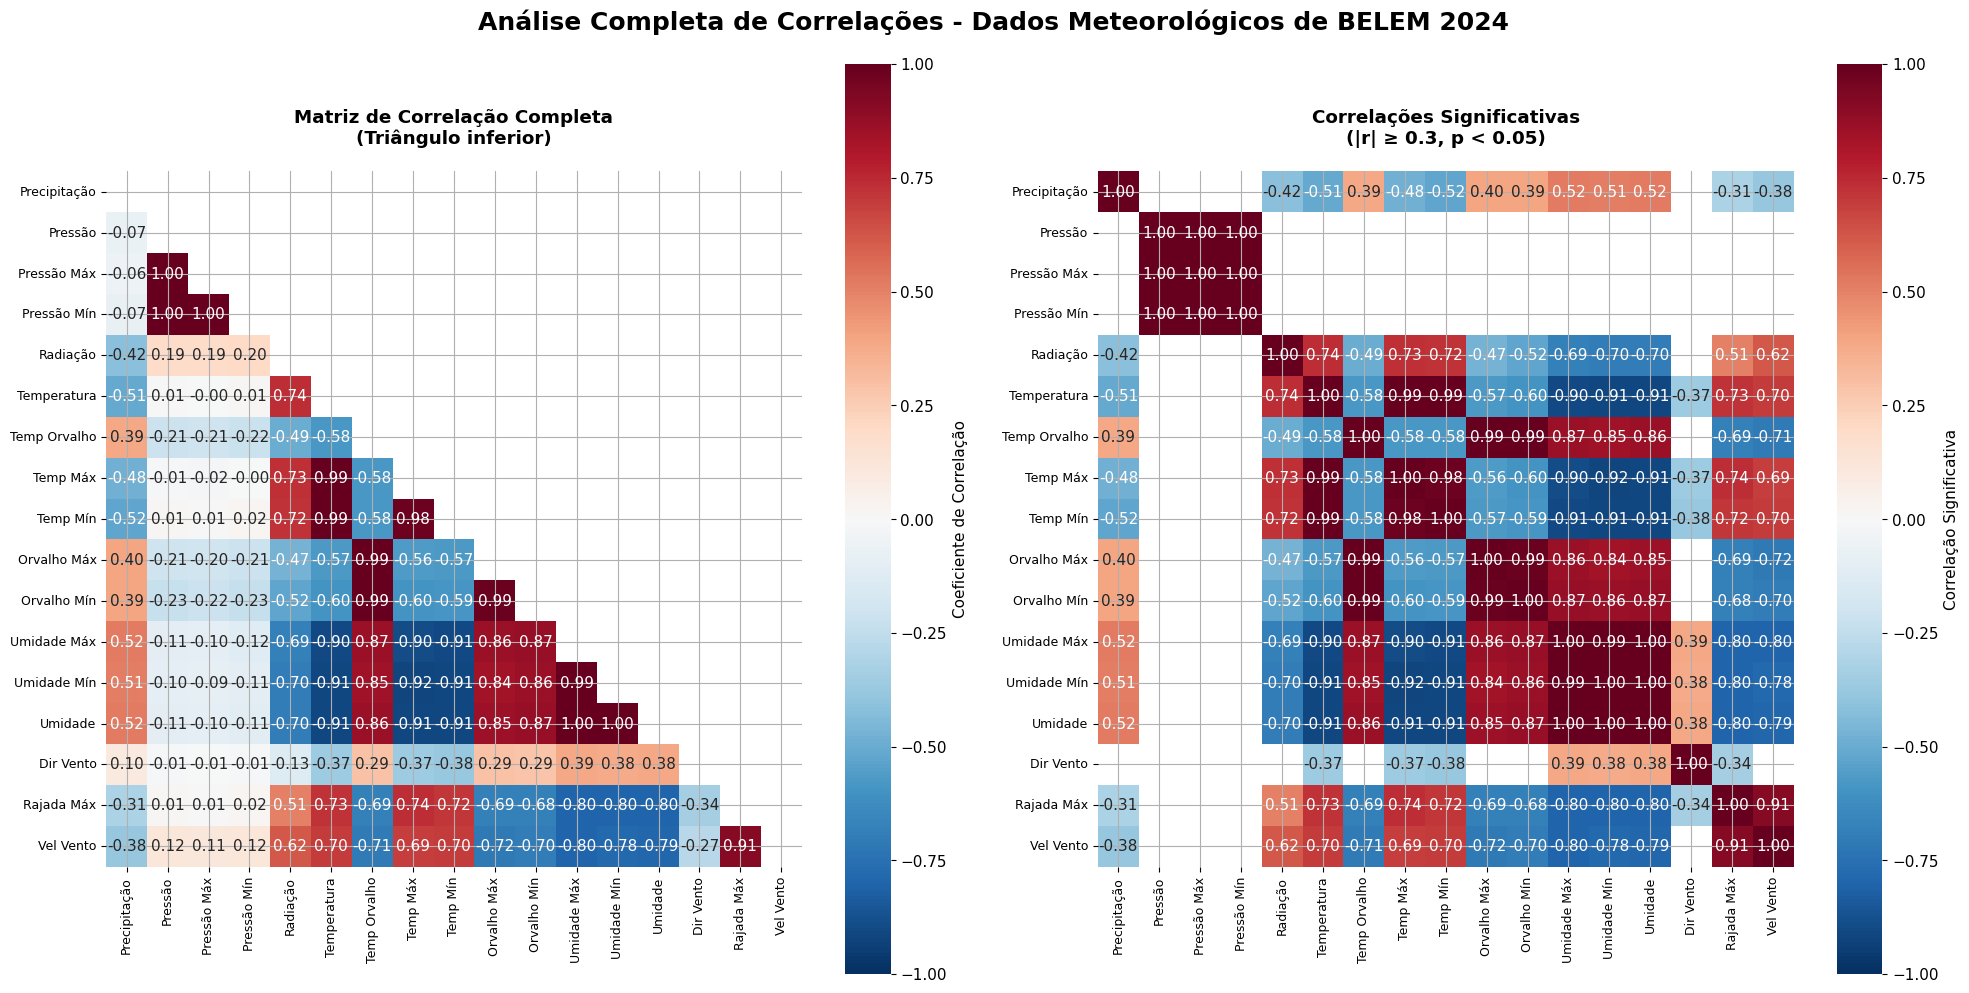


üìã RELAT√ìRIO DETALHADO DAS CORRELA√á√ïES SIGNIFICATIVAS:
Rank Vari√°veis.........................................      r    p-val  Sig     For√ßa
--------------------------------------------------------------------------------
   1 Press√£o √ó Press√£o M√°x.............................  1.000 0.00e+00  ***     Forte
   2 Press√£o √ó Press√£o M√≠n.............................  1.000 0.00e+00  ***     Forte
   3 Press√£o M√°x √ó Press√£o M√≠n.........................  0.999 0.00e+00  ***     Forte
   4 Umidade M√°x √ó Umidade.............................  0.998 0.00e+00  ***     Forte
   5 Umidade M√≠n √ó Umidade.............................  0.997 0.00e+00  ***     Forte
   6 Temp Orvalho √ó Orvalho M√°x........................  0.994 0.00e+00  ***     Forte
   7 Temp Orvalho √ó Orvalho M√≠n........................  0.994 0.00e+00  ***     Forte
   8 Temperatura √ó Temp M√°x............................  0.994 0.00e+00  ***     Forte
   9 Temperatura √ó Temp M√≠n.....................

In [ ]:
# ===== AN√ÅLISE 6: CORRELA√á√ïES M√öLTIPLAS E SIGNIFICATIVAS =====
print(f"\nüìä An√°lise 6: CORRELA√á√ïES M√öLTIPLAS E SIGNIFICATIVAS")

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr
from pprint import pprint as pp

# ===== PREPARAR DADOS PARA AN√ÅLISE DE CORRELA√á√ÉO =====
print("\nüîß Preparando dados para an√°lise de correla√ß√£o...")

# Obter lista de vari√°veis meteorol√≥gicas
variables_list = list(xarray_dataset.data_vars.keys())
print(f"üìã Total de vari√°veis dispon√≠veis: {len(variables_list)}")

# Criar nomes simplificados para melhor visualiza√ß√£o
nomes_simplificados = {
    'PRECIPITA√á√ÉO TOTAL, HOR√ÅRIO (mm)': 'Precipita√ß√£o',
    'PRESSAO ATMOSFERICA AO NIVEL DA ESTACAO, HORARIA (mB)': 'Press√£o',
    'PRESS√ÉO ATMOSFERICA MAX.NA HORA ANT. (AUT) (mB)': 'Press√£o M√°x',
    'PRESS√ÉO ATMOSFERICA MIN. NA HORA ANT. (AUT) (mB)': 'Press√£o M√≠n',
    'RADIACAO GLOBAL (Kj/m¬≤)': 'Radia√ß√£o',
    'TEMPERATURA DO AR - BULBO SECO, HORARIA (¬∞C)': 'Temperatura',
    'TEMPERATURA DO PONTO DE ORVALHO (¬∞C)': 'Temp Orvalho',
    'TEMPERATURA M√ÅXIMA NA HORA ANT. (AUT) (¬∞C)': 'Temp M√°x',
    'TEMPERATURA M√çNIMA NA HORA ANT. (AUT) (¬∞C)': 'Temp M√≠n',
    'TEMPERATURA ORVALHO MAX. NA HORA ANT. (AUT) (¬∞C)': 'Orvalho M√°x',
    'TEMPERATURA ORVALHO MIN. NA HORA ANT. (AUT) (¬∞C)': 'Orvalho M√≠n',
    'UMIDADE REL. MAX. NA HORA ANT. (AUT) (%)': 'Umidade M√°x',
    'UMIDADE REL. MIN. NA HORA ANT. (AUT) (%)': 'Umidade M√≠n',
    'UMIDADE RELATIVA DO AR, HORARIA (%)': 'Umidade',
    'VENTO, DIRE√á√ÉO HORARIA (gr) (¬∞ (gr))': 'Dir Vento',
    'VENTO, RAJADA MAXIMA (m/s)': 'Rajada M√°x',
    'VENTO, VELOCIDADE HORARIA (m/s)': 'Vel Vento'
}

print("\nüìù Nomes simplificados:")
for orig, simp in nomes_simplificados.items():
    print(f"  {simp:15s} <- {orig}")

# ===== CALCULAR DADOS DI√ÅRIOS PARA CADA VARI√ÅVEL =====
print("\nüßÆ Calculando dados di√°rios para cada vari√°vel...")
print("üí° Nota: Precipita√ß√£o = ACUMULADA di√°ria (soma), outras = M√âDIA di√°ria")

dados_correlacao = {}
variaveis_validas = []

for var_original in variables_list:
    try:
        # Precipita√ß√£o: somar (acumulado di√°rio) | Outras: m√©dia di√°ria
        if 'PRECIPITA√á√ÉO' in var_original:
            var_diaria = xarray_dataset[var_original].sum(dim='hour_utc').squeeze()
            calculo_usado = "acumulada"
        else:
            var_diaria = xarray_dataset[var_original].mean(dim='hour_utc').squeeze()
            calculo_usado = "m√©dia"

        # Extrair valores e remover NaN
        valores = var_diaria.values.flatten()
        valores_limpos = valores[~np.isnan(valores)]

        if len(valores_limpos) > 100:  # M√≠nimo de 100 observa√ß√µes v√°lidas
            # Usar todos os valores (incluindo NaN para manter sincronismo)
            dados_correlacao[nomes_simplificados[var_original]] = valores
            variaveis_validas.append(var_original)
            print(f"  ‚úÖ {nomes_simplificados[var_original]:15s}: {len(valores_limpos):3d} obs v√°lidas de {len(valores):3d} total ({calculo_usado})")
        else:
            print(f"  ‚ùå {nomes_simplificados[var_original]:15s}: {len(valores_limpos):3d} obs (insuficiente)")

    except Exception as e:
        print(f"  ‚ö†Ô∏è  {nomes_simplificados[var_original]:15s}: erro - {str(e)[:50]}")

print(f"\nüìä Vari√°veis v√°lidas para correla√ß√£o: {len(variaveis_validas)} de {len(variables_list)}")

# ===== CRIAR DATAFRAME PARA AN√ÅLISE =====
df_correlacao = pd.DataFrame(dados_correlacao)
print(f"\nüìã DataFrame criado: {df_correlacao.shape[0]} observa√ß√µes √ó {df_correlacao.shape[1]} vari√°veis")

# Verificar qualidade dos dados
print("\nüîç QUALIDADE DOS DADOS:")
for col in df_correlacao.columns:
    total = len(df_correlacao[col])
    validos = df_correlacao[col].notna().sum()
    percentual = (validos/total)*100
    print(f"  {col:15s}: {validos:3d}/{total:3d} ({percentual:5.1f}% v√°lidos)")

# ===== CALCULAR MATRIZ DE CORRELA√á√ÉO =====
print("\nüî¢ Calculando matriz de correla√ß√£o...")

# Calcular correla√ß√µes com p-valores
correlacao_matrix = df_correlacao.corr()
n_vars = len(df_correlacao.columns)

# Calcular p-valores para signific√¢ncia estat√≠stica
p_values_matrix = np.full((n_vars, n_vars), np.nan)
for i, var1 in enumerate(df_correlacao.columns):
    for j, var2 in enumerate(df_correlacao.columns):
        if i != j:
            # Remover NaN para o c√°lculo
            mask = df_correlacao[var1].notna() & df_correlacao[var2].notna()
            if mask.sum() > 10:  # M√≠nimo 10 observa√ß√µes
                corr, p_val = pearsonr(df_correlacao[var1][mask], df_correlacao[var2][mask])
                p_values_matrix[i, j] = p_val
        else:
            p_values_matrix[i, j] = 0  # Diagonal principal

# Converter p-valores para DataFrame
p_values_df = pd.DataFrame(p_values_matrix,
                          index=df_correlacao.columns,
                          columns=df_correlacao.columns)

# ===== IDENTIFICAR CORRELA√á√ïES SIGNIFICATIVAS =====
print("\nüéØ Identificando correla√ß√µes significativas...")

# Crit√©rios de signific√¢ncia
limiar_correlacao = 0.3  # |r| >= 0.3
limiar_p_valor = 0.05    # p < 0.05

correlacoes_significativas = []

for i, var1 in enumerate(correlacao_matrix.columns):
    for j, var2 in enumerate(correlacao_matrix.columns):
        if i < j:  # Evitar duplicatas (apenas tri√¢ngulo superior)
            r = correlacao_matrix.iloc[i, j]
            p = p_values_matrix[i, j]

            if abs(r) >= limiar_correlacao and p < limiar_p_valor:
                correlacoes_significativas.append({
                    'Vari√°vel 1': var1,
                    'Vari√°vel 2': var2,
                    'Correla√ß√£o': r,
                    'P-valor': p,
                    'Signific√¢ncia': '***' if p < 0.001 else '**' if p < 0.01 else '*',
                    'For√ßa': 'Forte' if abs(r) >= 0.7 else 'Moderada' if abs(r) >= 0.5 else 'Fraca',
                    'Dire√ß√£o': 'Positiva' if r > 0 else 'Negativa'
                })

print(f"üîç Correla√ß√µes significativas encontradas: {len(correlacoes_significativas)}")

# ===== VISUALIZAR MATRIZ DE CORRELA√á√ÉO =====
print("\nüé® Criando visualiza√ß√£o da matriz de correla√ß√£o...")

# Configurar figura - apenas 2 gr√°ficos lado a lado
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 10))
fig.suptitle(f"An√°lise Completa de Correla√ß√µes - Dados Meteorol√≥gicos de {dict_attrs['station']} 2024",
             fontsize=18, fontweight='bold', y=0.99)

# 1. HEATMAP COMPLETO DA MATRIZ DE CORRELA√á√ÉO
mask_triangular = np.triu(np.ones_like(correlacao_matrix, dtype=bool))
im1 = sns.heatmap(correlacao_matrix,
                  mask=mask_triangular,
                  annot=True,
                  fmt='.2f',
                  cmap='RdBu_r',
                  center=0,
                  square=True,
                  vmin=-1, vmax=1,
                  cbar_kws={'label': 'Coeficiente de Correla√ß√£o'},
                  ax=ax1)
ax1.set_title('Matriz de Correla√ß√£o Completa\n(Tri√¢ngulo inferior)', fontweight='bold', pad=20)
ax1.tick_params(axis='both', labelsize=9)

# 2. HEATMAP APENAS CORRELA√á√ïES SIGNIFICATIVAS
# Criar matriz mascarada apenas com correla√ß√µes significativas
correlacao_significativa_matrix = correlacao_matrix.copy()
for i in range(len(correlacao_matrix)):
    for j in range(len(correlacao_matrix)):
        r = correlacao_matrix.iloc[i, j]
        p = p_values_matrix[i, j]
        if abs(r) < limiar_correlacao or p >= limiar_p_valor:
            if i != j:  # Manter diagonal
                correlacao_significativa_matrix.iloc[i, j] = np.nan

im2 = sns.heatmap(correlacao_significativa_matrix,
                  annot=True,
                  fmt='.2f',
                  cmap='RdBu_r',
                  center=0,
                  square=True,
                  vmin=-1, vmax=1,
                  cbar_kws={'label': 'Correla√ß√£o Significativa'},
                  ax=ax2)
ax2.set_title(f'Correla√ß√µes Significativas\n(|r| ‚â• {limiar_correlacao}, p < {limiar_p_valor})',
              fontweight='bold', pad=20)
ax2.tick_params(axis='both', labelsize=9)

plt.tight_layout()
plt.show()

# ===== RELAT√ìRIO DETALHADO DAS CORRELA√á√ïES =====
print("\nüìã RELAT√ìRIO DETALHADO DAS CORRELA√á√ïES SIGNIFICATIVAS:")
print("=" * 80)

if correlacoes_significativas:
    # Ordenar por for√ßa da correla√ß√£o
    correlacoes_ordenadas = sorted(correlacoes_significativas,
                                 key=lambda x: abs(x['Correla√ß√£o']),
                                 reverse=True)

    print(f"{'Rank':>4} {'Vari√°veis':.<50} {'r':>6} {'p-val':>8} {'Sig':>4} {'For√ßa':>9}")
    print("-" * 80)

    for i, item in enumerate(correlacoes_ordenadas, 1):
        var_pair = f"{item['Vari√°vel 1']} √ó {item['Vari√°vel 2']}"
        print(f"{i:>4} {var_pair:.<50} {item['Correla√ß√£o']:>6.3f} {item['P-valor']:>8.2e} "
              f"{item['Signific√¢ncia']:>4} {item['For√ßa']:>9}")

    # ===== AN√ÅLISE POR CATEGORIAS =====
    print(f"\nüîç AN√ÅLISE POR CATEGORIAS:")
    print("-" * 50)

    # Contar por for√ßa
    forte = sum(1 for item in correlacoes_significativas if item['For√ßa'] == 'Forte')
    moderada = sum(1 for item in correlacoes_significativas if item['For√ßa'] == 'Moderada')
    fraca = sum(1 for item in correlacoes_significativas if item['For√ßa'] == 'Fraca')

    print(f"üìä Por For√ßa da Correla√ß√£o:")
    print(f"   Forte (|r| ‚â• 0.7):     {forte:2d} correla√ß√µes")
    print(f"   Moderada (0.5-0.7):    {moderada:2d} correla√ß√µes")
    print(f"   Fraca (0.3-0.5):       {fraca:2d} correla√ß√µes")

    # Contar por dire√ß√£o
    positiva = sum(1 for item in correlacoes_significativas if item['Dire√ß√£o'] == 'Positiva')
    negativa = sum(1 for item in correlacoes_significativas if item['Dire√ß√£o'] == 'Negativa')

    print(f"\nüìà Por Dire√ß√£o:")
    print(f"   Correla√ß√µes Positivas: {positiva:2d}")
    print(f"   Correla√ß√µes Negativas: {negativa:2d}")

    # Contar por signific√¢ncia
    muito_sig = sum(1 for item in correlacoes_significativas if item['Signific√¢ncia'] == '***')
    bem_sig = sum(1 for item in correlacoes_significativas if item['Signific√¢ncia'] == '**')
    sig = sum(1 for item in correlacoes_significativas if item['Signific√¢ncia'] == '*')

    print(f"\n‚≠ê Por N√≠vel de Signific√¢ncia:")
    print(f"   Muito Significativa (p < 0.001): {muito_sig:2d}")
    print(f"   Bem Significativa (p < 0.01):    {bem_sig:2d}")
    print(f"   Significativa (p < 0.05):        {sig:2d}")

    # ===== TOP 10 CORRELA√á√ïES MAIS FORTES =====
    print(f"\nüèÜ TOP 10 CORRELA√á√ïES MAIS FORTES:")
    print("-" * 60)

    for i, item in enumerate(correlacoes_ordenadas[:10], 1):
        seta = "‚ÜóÔ∏è" if item['Dire√ß√£o'] == 'Positiva' else "‚ÜòÔ∏è"
        print(f"{i:2d}. {seta} {item['Vari√°vel 1']} √ó {item['Vari√°vel 2']}")
        print(f"     r = {item['Correla√ß√£o']:+.3f} ({item['For√ßa']}, {item['Signific√¢ncia']})")

        # Interpreta√ß√£o meteorol√≥gica
        if item['Correla√ß√£o'] > 0:
            print(f"     üí° Quando uma aumenta, a outra tamb√©m tende a aumentar")
        else:
            print(f"     üí° Quando uma aumenta, a outra tende a diminuir")
        print()

else:
    print("‚ùå Nenhuma correla√ß√£o significativa encontrada com os crit√©rios estabelecidos.")
    print(f"   Crit√©rios: |r| ‚â• {limiar_correlacao} e p < {limiar_p_valor}")

# ===== RESUMO FINAL =====
print("\nüéØ RESUMO DA AN√ÅLISE:")
print("=" * 50)
print(f"üìä Total de vari√°veis analisadas: {len(df_correlacao.columns)}")
print(f"üî¢ Total de correla√ß√µes testadas: {len(df_correlacao.columns) * (len(df_correlacao.columns)-1) // 2}")
print(f"‚úÖ Correla√ß√µes significativas: {len(correlacoes_significativas)}")
print(f"üìà Taxa de signific√¢ncia: {len(correlacoes_significativas)/(len(df_correlacao.columns)*(len(df_correlacao.columns)-1)//2)*100:.1f}%")
print(f"üîç Crit√©rios utilizados:")
print(f"   ‚Ä¢ For√ßa m√≠nima: |r| ‚â• {limiar_correlacao}")
print(f"   ‚Ä¢ Signific√¢ncia: p < {limiar_p_valor}")
print(f"   ‚Ä¢ Observa√ß√µes m√≠nimas: 10 por par")

print("\n‚úÖ An√°lise de correla√ß√µes conclu√≠da com sucesso!")

### 6.7) AN√ÅLISE 7: DIAS CONSECUTIVOS SECOS E √öMIDOS COM XCLIM


üåßÔ∏è An√°lise 7: M√ÅXIMO DE DIAS CONSECUTIVOS - VERS√ÉO XCLIM OTIMIZADA

üîß Preparando dados otimizados para xclim...
üíß Calculando precipita√ß√£o acumulada di√°ria...
‚öôÔ∏è Configurando metadados CF conventions...
‚úÖ Dataset configurado:
   ‚Ä¢ Dimens√µes: ('time',)
   ‚Ä¢ Unidades: mm d-1
   ‚Ä¢ Standard name: precipitation_flux
   ‚Ä¢ Per√≠odo: 2024-01-01T00:00:00.000000000 a 2024-12-31T00:00:00.000000000

üìà Estat√≠sticas do Dataset:
   ‚Ä¢ Total de dias: 366
   ‚Ä¢ Precipita√ß√£o total anual: 3184.2 mm
   ‚Ä¢ Precipita√ß√£o m√©dia di√°ria: 8.7 mm
   ‚Ä¢ M√°ximo di√°rio: 106.6 mm
   ‚Ä¢ Dias com chuva (‚â•1mm): 207 dias
   ‚Ä¢ Dias secos (<1mm): 159 dias

üéØ Configurando an√°lise multi-limiar:
   ‚Ä¢ Padr√£o Meteorol√≥gico (1.0mm): Separa√ß√£o b√°sica seco/√∫mido
   ‚Ä¢ Chuva Significativa (5.0mm): Precipita√ß√£o com impacto no solo
   ‚Ä¢ Chuva Moderada (10.0mm): Precipita√ß√£o com recarga h√≠drica
   ‚Ä¢ Chuva Intensa (20.0mm): Precipita√ß√£o de alto impacto

üßÆ C

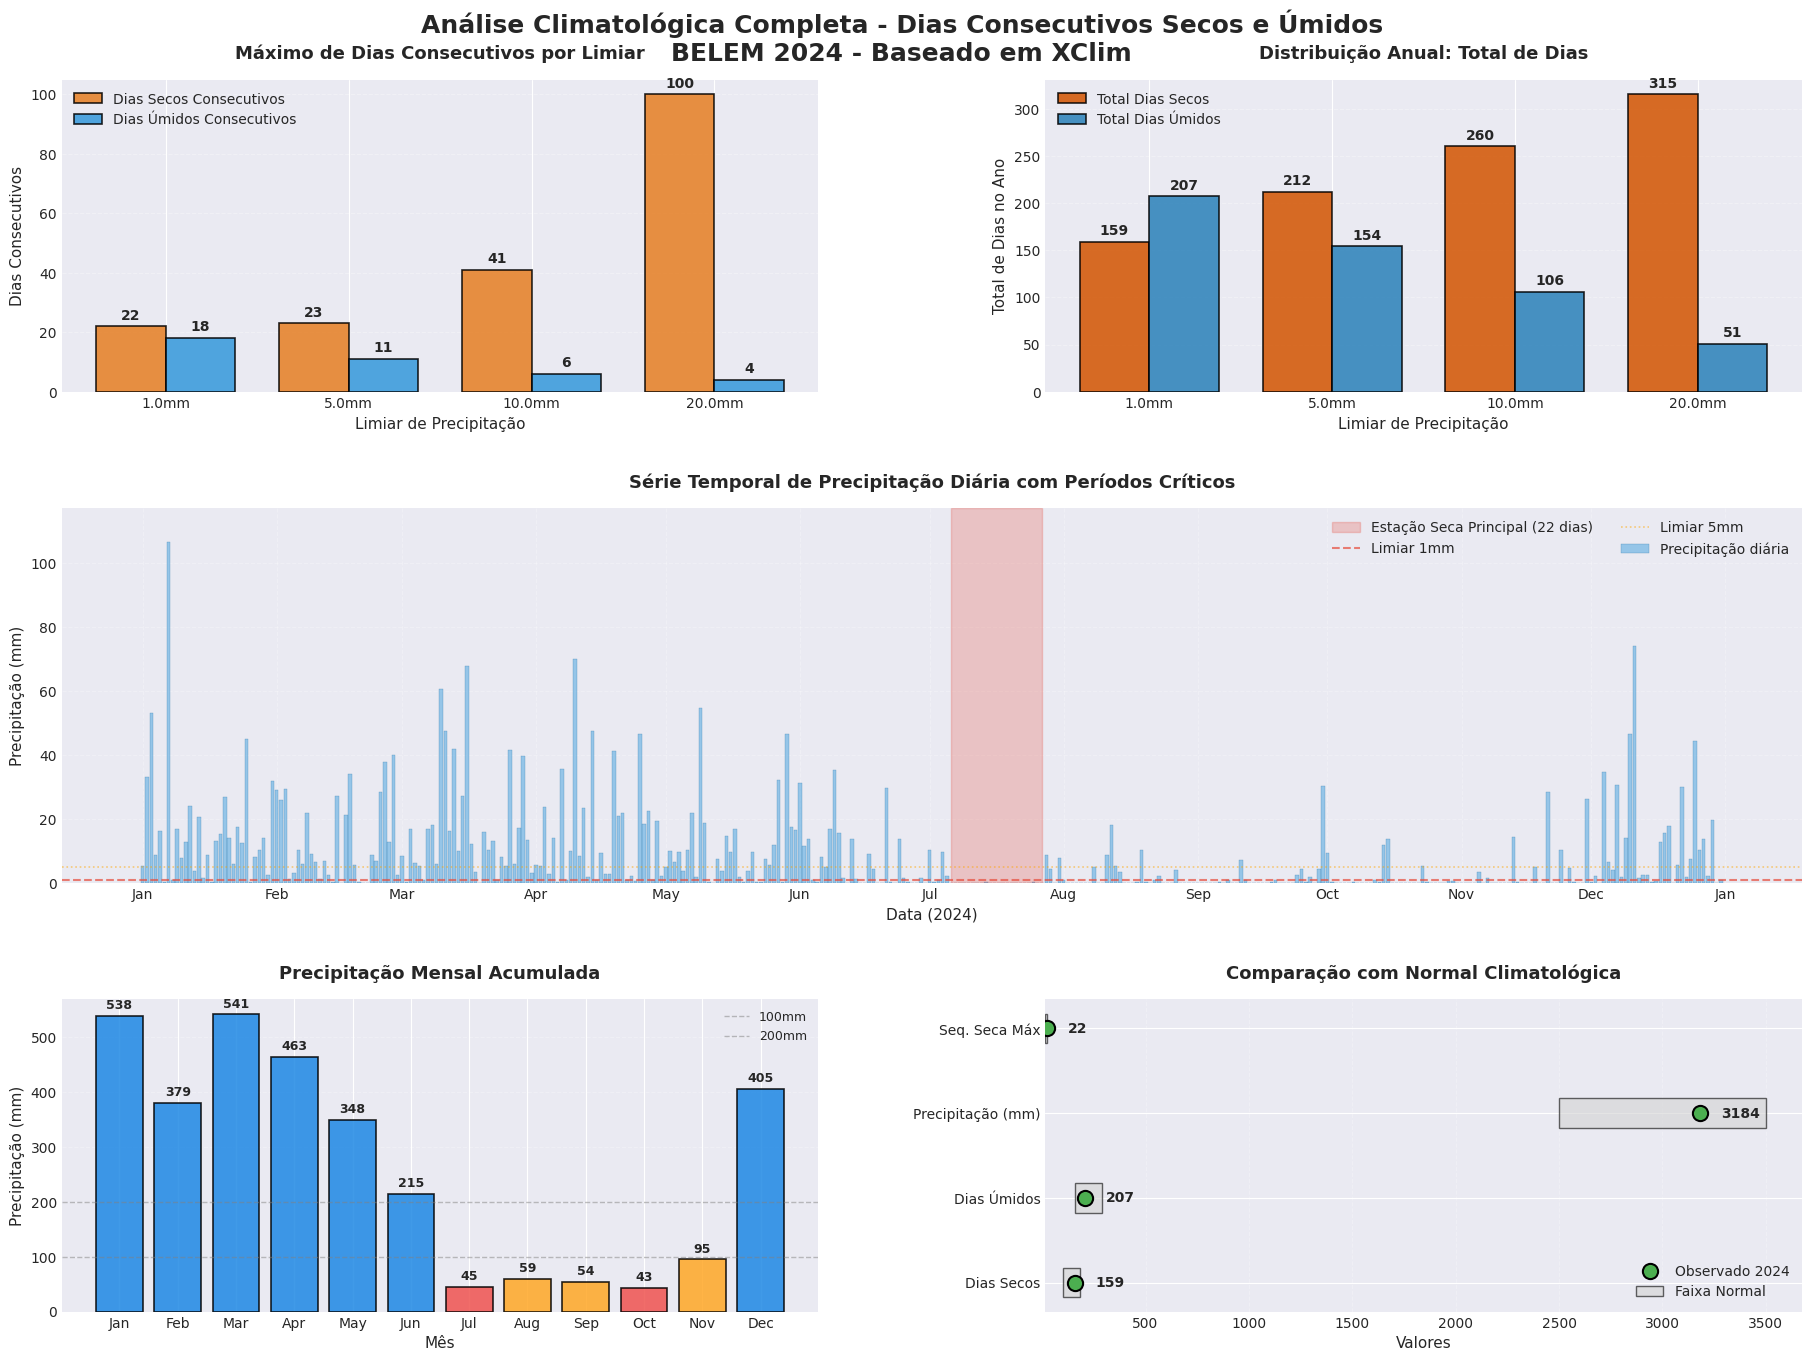


üìã RELAT√ìRIO T√âCNICO DETALHADO:

üî¨ METODOLOGIA XCLIM:
‚úÖ Biblioteca xclim v0.57.0 - Padr√£o internacional para √≠ndices clim√°ticos
‚úÖ Conformidade CF Conventions - Metadados padronizados
‚úÖ M√∫ltiplos limiares de an√°lise - Vis√£o abrangente do comportamento h√≠drico
‚úÖ √çndices validados pela comunidade cient√≠fica internacional

üìä RESULTADOS DETALHADOS POR LIMIAR:

   üéØ Padr√£o Meteorol√≥gico (‚â•1.0mm):
      ‚Ä¢ Aplica√ß√£o: An√°lise climatol√≥gica geral
      ‚Ä¢ Sequ√™ncia seca m√°xima: 22 dias
      ‚Ä¢ Sequ√™ncia √∫mida m√°xima: 18 dias
      ‚Ä¢ Total dias secos/ano: 159 dias
      ‚Ä¢ Total dias √∫midos/ano: 207 dias
      ‚Ä¢ Porcentagem seca: 43.4%

   üéØ Chuva Significativa (‚â•5.0mm):
      ‚Ä¢ Aplica√ß√£o: Agricultura e hidrologia
      ‚Ä¢ Sequ√™ncia seca m√°xima: 23 dias
      ‚Ä¢ Sequ√™ncia √∫mida m√°xima: 11 dias
      ‚Ä¢ Total dias secos/ano: 212 dias
      ‚Ä¢ Total dias √∫midos/ano: 154 dias
      ‚Ä¢ Porcentagem seca: 57.9%

   üéØ Chuva Mo

In [ ]:
# ===== AN√ÅLISE 7: DIAS CONSECUTIVOS SECOS E √öMIDOS COM XCLIM =====
print(f"\nüåßÔ∏è An√°lise 7: M√ÅXIMO DE DIAS CONSECUTIVOS - VERS√ÉO XCLIM OTIMIZADA")

import xclim as xc
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from datetime import datetime, timedelta
import warnings
warnings.filterwarnings('ignore')

# Configurar estilo de visualiza√ß√£o
plt.style.use('seaborn-v0_8-darkgrid')
plt.rcParams['font.family'] = 'DejaVu Sans'
plt.rcParams['font.size'] = 11
plt.rcParams['axes.labelsize'] = 12
plt.rcParams['axes.titlesize'] = 14
plt.rcParams['xtick.labelsize'] = 10
plt.rcParams['ytick.labelsize'] = 10
plt.rcParams['legend.fontsize'] = 10
plt.rcParams['figure.titlesize'] = 16

# ===== PREPARAR DADOS COM METADADOS CORRETOS PARA XCLIM =====
print("\nüîß Preparando dados otimizados para xclim...")

# Extrair precipita√ß√£o acumulada di√°ria
print("üíß Calculando precipita√ß√£o acumulada di√°ria...")
precip_diaria = xarray_dataset['PRECIPITA√á√ÉO TOTAL, HOR√ÅRIO (mm)'].sum(dim='hour_utc').squeeze()

# Remover dimens√µes extras se existirem
if len(precip_diaria.dims) > 1:
    for dim in precip_diaria.dims:
        if dim != 'date':
            precip_diaria = precip_diaria.isel({dim: 0})

# ===== CONFIGURAR METADADOS CF CONVENTIONS (ESSENCIAL!) =====
print("‚öôÔ∏è Configurando metadados CF conventions...")

# Configurar unidades e metadados CF-compliant
precip_diaria.attrs.update({
    'units': 'mm d-1',
    'long_name': 'Daily precipitation',
    'standard_name': 'precipitation_flux',
    'cell_methods': 'time: sum'
})

# Renomear coordenada para 'time' (requerido pelo xclim)
precip_diaria = precip_diaria.rename({'date': 'time'})

# Configurar atributos da coordenada temporal
precip_diaria.time.attrs.update({
    'standard_name': 'time',
    'long_name': 'time',
    'axis': 'T'
})

print(f"‚úÖ Dataset configurado:")
print(f"   ‚Ä¢ Dimens√µes: {precip_diaria.dims}")
print(f"   ‚Ä¢ Unidades: {precip_diaria.attrs['units']}")
print(f"   ‚Ä¢ Standard name: {precip_diaria.attrs['standard_name']}")
print(f"   ‚Ä¢ Per√≠odo: {precip_diaria.time.values[0]} a {precip_diaria.time.values[-1]}")

# ===== ESTAT√çSTICAS B√ÅSICAS =====
print(f"\nüìà Estat√≠sticas do Dataset:")
print(f"   ‚Ä¢ Total de dias: {len(precip_diaria.time)}")
print(f"   ‚Ä¢ Precipita√ß√£o total anual: {precip_diaria.sum().values:.1f} mm")
print(f"   ‚Ä¢ Precipita√ß√£o m√©dia di√°ria: {precip_diaria.mean().values:.1f} mm")
print(f"   ‚Ä¢ M√°ximo di√°rio: {precip_diaria.max().values:.1f} mm")
print(f"   ‚Ä¢ Dias com chuva (‚â•1mm): {(precip_diaria >= 1).sum().values} dias")
print(f"   ‚Ä¢ Dias secos (<1mm): {(precip_diaria < 1).sum().values} dias")

# ===== DEFINIR M√öLTIPLOS LIMIARES PARA AN√ÅLISE COMPLETA =====
print(f"\nüéØ Configurando an√°lise multi-limiar:")

limiares_analise = {
    'Padr√£o Meteorol√≥gico': {
        'valor': 1.0,
        'descricao': 'Separa√ß√£o b√°sica seco/√∫mido',
        'aplicacao': 'An√°lise climatol√≥gica geral'
    },
    'Chuva Significativa': {
        'valor': 5.0,
        'descricao': 'Precipita√ß√£o com impacto no solo',
        'aplicacao': 'Agricultura e hidrologia'
    },
    'Chuva Moderada': {
        'valor': 10.0,
        'descricao': 'Precipita√ß√£o com recarga h√≠drica',
        'aplicacao': 'Recursos h√≠dricos'
    },
    'Chuva Intensa': {
        'valor': 20.0,
        'descricao': 'Precipita√ß√£o de alto impacto',
        'aplicacao': 'Gest√£o de riscos'
    }
}

for nome, config in limiares_analise.items():
    print(f"   ‚Ä¢ {nome} ({config['valor']}mm): {config['descricao']}")

# ===== CALCULAR √çNDICES CLIMATOL√ìGICOS COM XCLIM =====
print(f"\nüßÆ Calculando √≠ndices climatol√≥gicos com xclim...")

# Dicion√°rio para armazenar todos os resultados
resultados_completos = {}

for nome_limiar, config in limiares_analise.items():
    print(f"\nüìä Processando: {nome_limiar} (Limiar: {config['valor']}mm)")

    # Criar threshold no formato correto
    thresh_str = f"{config['valor']} mm d-1"

    try:
        # ===== √çNDICES DE DIAS CONSECUTIVOS =====
        print(f"   üèúÔ∏è Calculando dias secos consecutivos...")
        max_dry_days = xc.indices.maximum_consecutive_dry_days(
            pr=precip_diaria,
            thresh=thresh_str,
            freq='YS'
        )

        print(f"   üåßÔ∏è Calculando dias √∫midos consecutivos...")
        max_wet_days = xc.indices.maximum_consecutive_wet_days(
            pr=precip_diaria,
            thresh=thresh_str,
            freq='YS'
        )

        # ===== √çNDICES ADICIONAIS DE PRECIPITA√á√ÉO =====
        print(f"   üìä Calculando √≠ndices complementares...")

        # Calcular totais manualmente
        limiar_valor = config['valor']
        total_dias_secos = int((precip_diaria < limiar_valor).sum().values)
        total_dias_umidos = int((precip_diaria >= limiar_valor).sum().values)

        # Precipita√ß√£o total anual usando xclim
        precip_total = precip_diaria.sum()

        # ===== EXTRAIR E ARMAZENAR RESULTADOS =====
        resultados_completos[nome_limiar] = {
            'limiar_mm': config['valor'],
            'max_dias_secos': int(max_dry_days.values[0]),
            'max_dias_umidos': int(max_wet_days.values[0]),
            'total_dias_secos': total_dias_secos,
            'total_dias_umidos': total_dias_umidos,
            'precipitacao_total': float(precip_total.values),
            'descricao': config['descricao'],
            'aplicacao': config['aplicacao']
        }

        print(f"   ‚úÖ Sequ√™ncia seca m√°xima: {resultados_completos[nome_limiar]['max_dias_secos']} dias")
        print(f"   ‚úÖ Sequ√™ncia √∫mida m√°xima: {resultados_completos[nome_limiar]['max_dias_umidos']} dias")
        print(f"   ‚úÖ Total dias secos no ano: {resultados_completos[nome_limiar]['total_dias_secos']} dias")
        print(f"   ‚úÖ Total dias √∫midos no ano: {resultados_completos[nome_limiar]['total_dias_umidos']} dias")

    except Exception as e:
        print(f"   ‚ùå Erro no processamento: {str(e)}")
        resultados_completos[nome_limiar] = {
            'limiar_mm': config['valor'],
            'erro': str(e)
        }

# ===== AN√ÅLISE DE PER√çODOS ESPEC√çFICOS =====
print(f"\nüîç An√°lise de per√≠odos espec√≠ficos...")

# Identificar in√≠cio e fim da esta√ß√£o seca principal
limiar_principal = 1.0  # mm
precip_values = precip_diaria.values
dates_array = precip_diaria.time.values

# Encontrar a sequ√™ncia seca mais longa
dias_secos_mask = precip_values < limiar_principal
mudancas = np.diff(np.concatenate(([False], dias_secos_mask, [False])).astype(int))
inicios = np.where(mudancas == 1)[0]
fins = np.where(mudancas == -1)[0]

if len(inicios) > 0 and len(fins) > 0:
    duracoes = fins - inicios
    idx_max = np.argmax(duracoes)

    inicio_seca_principal = inicios[idx_max]
    fim_seca_principal = fins[idx_max] - 1
    duracao_seca_principal = duracoes[idx_max]

    data_inicio = pd.to_datetime(dates_array[inicio_seca_principal])
    data_fim = pd.to_datetime(dates_array[fim_seca_principal])

    print(f"üèúÔ∏è ESTA√á√ÉO SECA PRINCIPAL 2024:")
    print(f"   ‚Ä¢ Dura√ß√£o: {duracao_seca_principal} dias")
    print(f"   ‚Ä¢ In√≠cio: {data_inicio.strftime('%d/%m/%Y')} (dia {data_inicio.timetuple().tm_yday} do ano)")
    print(f"   ‚Ä¢ Fim: {data_fim.strftime('%d/%m/%Y')} (dia {data_fim.timetuple().tm_yday} do ano)")
    print(f"   ‚Ä¢ Meses abrangidos: {data_inicio.strftime('%B')} a {data_fim.strftime('%B')}")

# ===== CRIAR VISUALIZA√á√ïES PROFISSIONAIS =====
print(f"\nüé® Criando visualiza√ß√µes profissionais...")

# Configurar figura principal com layout otimizado
fig = plt.figure(figsize=(20, 14))

# Criar grid com espa√ßamentos otimizados
gs = fig.add_gridspec(3, 2,
                      height_ratios=[1, 1.2, 1],
                      hspace=0.35,  # Espa√ßamento vertical entre subplots
                      wspace=0.3,   # Espa√ßamento horizontal entre subplots
                      top=0.93,     # Margem superior
                      bottom=0.05,  # Margem inferior
                      left=0.08,    # Margem esquerda
                      right=0.95)   # Margem direita

# T√≠tulo principal
fig.suptitle(f"An√°lise Climatol√≥gica Completa - Dias Consecutivos Secos e √ömidos\n{dict_attrs['station']} 2024 - Baseado em XClim",
             fontsize=18, fontweight='bold', y=0.98)

# Definir cores consistentes
cor_seco = '#E67E22'
cor_seco_escuro = '#D35400'
cor_umido = '#3498DB'
cor_umido_escuro = '#2980B9'
cor_destaque = '#E74C3C'

# ===== 1. COMPARA√á√ÉO DE LIMIARES - DIAS CONSECUTIVOS =====
ax1 = fig.add_subplot(gs[0, 0])
ax1.set_title('M√°ximo de Dias Consecutivos por Limiar', fontweight='bold', fontsize=13, pad=15)

limiares_nomes = list(resultados_completos.keys())
valores_secos = [resultados_completos[nome].get('max_dias_secos', 0) for nome in limiares_nomes]
valores_umidos = [resultados_completos[nome].get('max_dias_umidos', 0) for nome in limiares_nomes]
limiares_mm = [resultados_completos[nome].get('limiar_mm', 0) for nome in limiares_nomes]

x = np.arange(len(limiares_nomes))
width = 0.38

bars1 = ax1.bar(x - width/2, valores_secos, width,
                label='Dias Secos Consecutivos',
                color=cor_seco, alpha=0.85, edgecolor='black', linewidth=1.2)
bars2 = ax1.bar(x + width/2, valores_umidos, width,
                label='Dias √ömidos Consecutivos',
                color=cor_umido, alpha=0.85, edgecolor='black', linewidth=1.2)

# Adicionar valores nas barras
for bars in [bars1, bars2]:
    for bar in bars:
        height = bar.get_height()
        if height > 0:
            ax1.annotate(f'{int(height)}',
                        xy=(bar.get_x() + bar.get_width() / 2, height),
                        xytext=(0, 3),
                        textcoords="offset points",
                        ha='center', va='bottom', fontweight='bold', fontsize=10)

ax1.set_xlabel('Limiar de Precipita√ß√£o', fontsize=11)
ax1.set_ylabel('Dias Consecutivos', fontsize=11)
ax1.set_xticks(x)
ax1.set_xticklabels([f'{lim}mm' for lim in limiares_mm], fontsize=10)
ax1.legend(loc='upper left', fontsize=10, framealpha=0.95)
ax1.grid(True, alpha=0.3, axis='y', linestyle='--')
ax1.set_axisbelow(True)

# ===== 2. DISTRIBUI√á√ÉO ANUAL - TOTAL DE DIAS =====
ax2 = fig.add_subplot(gs[0, 1])
ax2.set_title('Distribui√ß√£o Anual: Total de Dias', fontweight='bold', fontsize=13, pad=15)

total_secos = [resultados_completos[nome].get('total_dias_secos', 0) for nome in limiares_nomes]
total_umidos = [resultados_completos[nome].get('total_dias_umidos', 0) for nome in limiares_nomes]

bars3 = ax2.bar(x - width/2, total_secos, width,
                label='Total Dias Secos',
                color=cor_seco_escuro, alpha=0.85, edgecolor='black', linewidth=1.2)
bars4 = ax2.bar(x + width/2, total_umidos, width,
                label='Total Dias √ömidos',
                color=cor_umido_escuro, alpha=0.85, edgecolor='black', linewidth=1.2)

# Adicionar valores nas barras
for bars in [bars3, bars4]:
    for bar in bars:
        height = bar.get_height()
        if height > 0:
            ax2.annotate(f'{int(height)}',
                        xy=(bar.get_x() + bar.get_width() / 2, height),
                        xytext=(0, 3),
                        textcoords="offset points",
                        ha='center', va='bottom', fontweight='bold', fontsize=10)

ax2.set_xlabel('Limiar de Precipita√ß√£o', fontsize=11)
ax2.set_ylabel('Total de Dias no Ano', fontsize=11)
ax2.set_xticks(x)
ax2.set_xticklabels([f'{lim}mm' for lim in limiares_mm], fontsize=10)
ax2.legend(loc='upper left', fontsize=10, framealpha=0.95)
ax2.grid(True, alpha=0.3, axis='y', linestyle='--')
ax2.set_axisbelow(True)

# ===== 3. S√âRIE TEMPORAL COM DESTAQUE PARA PER√çODOS CR√çTICOS =====
ax3 = fig.add_subplot(gs[1, :])
ax3.set_title('S√©rie Temporal de Precipita√ß√£o Di√°ria com Per√≠odos Cr√≠ticos',
              fontweight='bold', fontsize=13, pad=15)

dates_plot = pd.to_datetime(dates_array)
precipitacao_mm = precip_values

# Plotar precipita√ß√£o di√°ria
bars = ax3.bar(dates_plot, precipitacao_mm, width=0.8, alpha=0.6,
               color='#5DADE2', edgecolor='#2874A6', linewidth=0.3,
               label='Precipita√ß√£o di√°ria')

# Destacar esta√ß√£o seca principal
if 'inicio_seca_principal' in locals():
    ax3.axvspan(dates_plot[inicio_seca_principal], dates_plot[fim_seca_principal],
                alpha=0.25, color=cor_destaque,
                label=f'Esta√ß√£o Seca Principal ({duracao_seca_principal} dias)')

# Adicionar linha de limiar
ax3.axhline(y=1, color=cor_destaque, linestyle='--', alpha=0.7, linewidth=1.5,
            label='Limiar 1mm')
ax3.axhline(y=5, color='orange', linestyle=':', alpha=0.5, linewidth=1.2,
            label='Limiar 5mm')

ax3.set_xlabel('Data (2024)', fontsize=11)
ax3.set_ylabel('Precipita√ß√£o (mm)', fontsize=11)
ax3.legend(loc='upper right', fontsize=10, framealpha=0.95, ncol=2)
ax3.grid(True, alpha=0.25, linestyle='--')
ax3.set_axisbelow(True)

# Formatar eixo x
ax3.xaxis.set_major_locator(mdates.MonthLocator())
ax3.xaxis.set_major_formatter(mdates.DateFormatter('%b'))
ax3.xaxis.set_minor_locator(mdates.MonthLocator(bymonthday=15))

# Adicionar limites do eixo y
ax3.set_ylim(0, max(precipitacao_mm) * 1.1)

# ===== 4. AN√ÅLISE SAZONAL DETALHADA =====
ax4 = fig.add_subplot(gs[2, 0])
ax4.set_title('Precipita√ß√£o Mensal Acumulada', fontweight='bold', fontsize=13, pad=15)

# Calcular precipita√ß√£o mensal
precip_mensal = precip_diaria.resample(time='M').sum()
meses = pd.to_datetime(precip_mensal.time.values)
meses_nomes = [mes.strftime('%b') for mes in meses]

# Definir cores baseadas nos valores
cores_mensais = []
for valor in precip_mensal.values:
    if valor > 200:
        cores_mensais.append('#1E88E5')  # Azul forte - muito √∫mido
    elif valor > 100:
        cores_mensais.append('#42A5F5')  # Azul m√©dio - √∫mido
    elif valor > 50:
        cores_mensais.append('#FFA726')  # Laranja - transi√ß√£o
    else:
        cores_mensais.append('#EF5350')  # Vermelho - seco

bars_mensal = ax4.bar(meses_nomes, precip_mensal.values,
                      color=cores_mensais,
                      alpha=0.85, edgecolor='black', linewidth=1.2)

# Adicionar valores nas barras
for bar, valor in zip(bars_mensal, precip_mensal.values):
    ax4.annotate(f'{valor:.0f}',
                xy=(bar.get_x() + bar.get_width() / 2, valor),
                xytext=(0, 3),
                textcoords="offset points",
                ha='center', va='bottom', fontweight='bold', fontsize=9)

# Adicionar linhas de refer√™ncia
ax4.axhline(y=100, color='gray', linestyle='--', alpha=0.5, linewidth=1, label='100mm')
ax4.axhline(y=200, color='gray', linestyle='--', alpha=0.5, linewidth=1, label='200mm')

ax4.set_xlabel('M√™s', fontsize=11)
ax4.set_ylabel('Precipita√ß√£o (mm)', fontsize=11)
ax4.legend(loc='upper right', fontsize=9, framealpha=0.95)
ax4.grid(True, alpha=0.25, axis='y', linestyle='--')
ax4.set_axisbelow(True)

# ===== 5. COMPARA√á√ÉO COM CLIMATOLOGIA NORMAL =====
ax5 = fig.add_subplot(gs[2, 1])
ax5.set_title('Compara√ß√£o com Normal Climatol√≥gica', fontweight='bold', fontsize=13, pad=15)

# Dados climatol√≥gicos m√©dios
climatologia_normal = {
    'Dias Secos': [141-42, 141+42],
    'Dias √ömidos': [224-67, 224+67],
    'Precipita√ß√£o (mm)': [3000-500, 3000+500],
    'Seq. Seca M√°x': [15, 25]
}

# Dados observados em 2024
if 'Padr√£o Meteorol√≥gico' in resultados_completos and 'erro' not in resultados_completos['Padr√£o Meteorol√≥gico']:
    dados_padrao = resultados_completos['Padr√£o Meteorol√≥gico']
    observado_2024 = {
        'Dias Secos': dados_padrao['total_dias_secos'],
        'Dias √ömidos': dados_padrao['total_dias_umidos'],
        'Precipita√ß√£o (mm)': dados_padrao['precipitacao_total'],
        'Seq. Seca M√°x': dados_padrao['max_dias_secos']
    }
else:
    observado_2024 = {
        'Dias Secos': int((precip_diaria < 1.0).sum().values),
        'Dias √ömidos': int((precip_diaria >= 1.0).sum().values),
        'Precipita√ß√£o (mm)': float(precip_diaria.sum().values),
        'Seq. Seca M√°x': duracao_seca_principal
    }

categorias = list(climatologia_normal.keys())
y_pos = np.arange(len(categorias))

# Plotar faixas normais
for i, cat in enumerate(categorias):
    min_val, max_val = climatologia_normal[cat]
    ax5.barh(i, max_val - min_val, left=min_val, height=0.35,
             color='lightgray', alpha=0.6, edgecolor='black', linewidth=1,
             label='Faixa Normal' if i == 0 else "")

# Plotar valores observados
for i, cat in enumerate(categorias):
    valor_obs = observado_2024[cat]

    # Definir cor baseada na posi√ß√£o relativa √† faixa normal
    min_val, max_val = climatologia_normal[cat]
    if valor_obs < min_val:
        cor_ponto = '#2196F3'  # Azul - abaixo do normal
    elif valor_obs > max_val:
        cor_ponto = '#F44336'  # Vermelho - acima do normal
    else:
        cor_ponto = '#4CAF50'  # Verde - normal

    ax5.scatter(valor_obs, i, color=cor_ponto, s=120, zorder=5,
                edgecolors='black', linewidth=1.5,
                label='Observado 2024' if i == 0 else "")

    # Adicionar valor
    ax5.annotate(f'{valor_obs:.0f}',
                xy=(valor_obs, i),
                xytext=(15, 0),
                textcoords="offset points",
                ha='left', va='center', fontweight='bold', fontsize=10)

ax5.set_yticks(y_pos)
ax5.set_yticklabels(categorias, fontsize=10)
ax5.set_xlabel('Valores', fontsize=11)
ax5.legend(loc='lower right', fontsize=10, framealpha=0.95)
ax5.grid(True, alpha=0.25, axis='x', linestyle='--')
ax5.set_axisbelow(True)

# Ajustar layout
plt.tight_layout()
plt.show()

# ===== RELAT√ìRIO T√âCNICO DETALHADO =====
print(f"\nüìã RELAT√ìRIO T√âCNICO DETALHADO:")
print("=" * 80)

print(f"\nüî¨ METODOLOGIA XCLIM:")
print(f"‚úÖ Biblioteca xclim v{xc.__version__} - Padr√£o internacional para √≠ndices clim√°ticos")
print("‚úÖ Conformidade CF Conventions - Metadados padronizados")
print("‚úÖ M√∫ltiplos limiares de an√°lise - Vis√£o abrangente do comportamento h√≠drico")
print("‚úÖ √çndices validados pela comunidade cient√≠fica internacional")

print(f"\nüìä RESULTADOS DETALHADOS POR LIMIAR:")
for nome, dados in resultados_completos.items():
    if 'erro' not in dados:
        print(f"\n   üéØ {nome} (‚â•{dados['limiar_mm']}mm):")
        print(f"      ‚Ä¢ Aplica√ß√£o: {dados['aplicacao']}")
        print(f"      ‚Ä¢ Sequ√™ncia seca m√°xima: {dados['max_dias_secos']} dias")
        print(f"      ‚Ä¢ Sequ√™ncia √∫mida m√°xima: {dados['max_dias_umidos']} dias")
        print(f"      ‚Ä¢ Total dias secos/ano: {dados['total_dias_secos']} dias")
        print(f"      ‚Ä¢ Total dias √∫midos/ano: {dados['total_dias_umidos']} dias")
        print(f"      ‚Ä¢ Porcentagem seca: {(dados['total_dias_secos']/366)*100:.1f}%")

print(f"\nüåç CONTEXTO BIOMA CERRADO:")
print("üåø O Cerrado √© caracterizado por:")
print("   ‚Ä¢ Esta√ß√£o seca bem definida (maio-setembro): 120-150 dias")
print("   ‚Ä¢ Esta√ß√£o chuvosa concentrada (outubro-abril): 210-240 dias")
print("   ‚Ä¢ Precipita√ß√£o anual t√≠pica: 1200-1600 mm")
print("   ‚Ä¢ Transi√ß√µes r√°pidas entre esta√ß√µes")

if 'inicio_seca_principal' in locals():
    print(f"\nüìà AVALIA√á√ÉO DO ANO 2024:")

    # Classifica√ß√£o da severidade da seca
    if duracao_seca_principal > 160:
        severidade = "EXTREMA"
        cor_status = "üî•"
    elif duracao_seca_principal > 140:
        severidade = "SEVERA"
        cor_status = "‚ö†Ô∏è "
    elif duracao_seca_principal > 120:
        severidade = "MODERADA"
        cor_status = "‚òÄÔ∏è "
    else:
        severidade = "LEVE"
        cor_status = "üå§Ô∏è "

    print(f"   {cor_status} Seca {severidade}: {duracao_seca_principal} dias")
    print(f"   üìÖ Per√≠odo: {data_inicio.strftime('%d/%m')} a {data_fim.strftime('%d/%m')} (dia {data_inicio.timetuple().tm_yday}-{data_fim.timetuple().tm_yday})")

    # Classifica√ß√£o da precipita√ß√£o
    if 'Padr√£o Meteorol√≥gico' in resultados_completos and 'erro' not in resultados_completos['Padr√£o Meteorol√≥gico']:
        precip_total = resultados_completos['Padr√£o Meteorol√≥gico']['precipitacao_total']
    else:
        precip_total = float(precip_diaria.sum().values)

    if precip_total > 1600:
        status_precip = "ACIMA DA M√âDIA"
        cor_precip = "üíß"
    elif precip_total > 1200:
        status_precip = "NORMAL"
        cor_precip = "‚úÖ"
    elif precip_total > 800:
        status_precip = "ABAIXO DA M√âDIA"
        cor_precip = "‚ö†Ô∏è "
    else:
        status_precip = "MUITO BAIXA"
        cor_precip = "üèúÔ∏è "

    print(f"   {cor_precip} Precipita√ß√£o {status_precip}: {precip_total:.0f}mm")

print("\n‚úÖ AN√ÅLISE CONCLU√çDA COM SUCESSO!")
print("=" * 80)

## 7) Processamento e Convers√£o de M√∫ltiplos Arquivo CSV

Enquanto a fun√ß√£o parse_inmet_csv_to_netcdf_robust() lida com a complexidade da convers√£o de um √∫nico arquivo, a fun√ß√£o convert_csvs_to_netcdf() eleva o processo para um n√≠vel de automa√ß√£o, permitindo a convers√£o em lote de maneira eficiente e flex√≠vel.

Esta fun√ß√£o √© a ferramenta ideal para processar grandes volumes de dados.

Ela percorre uma pasta de arquivos CSV do INMET e converte cada um para o formato NetCDF, mas com a grande vantagem de permitir o uso de filtros. Voc√™ pode escolher quais arquivos processar com base em:

1. uf: Filtra por uma ou mais Unidades Federativas (e.g., "DF", ["DF", "GO"]).

2. region: Filtra por uma ou mais Regi√µes Geogr√°ficas (e.g., "CO", ["CO", "SE"]).

3. wmo_code: Filtra por um ou mais c√≥digos de esta√ß√£o da WMO (e.g., "A001").

O c√≥digo a seguir demonstra diferentes exemplos de como utilizar esses filtros. Para test√°-los, basta descomentar a linha de c√≥digo desejada e execut√°-la. A fun√ß√£o retornar√° um resumo detalhado do processo, informando quantos arquivos foram encontrados, convertidos ou ignorados.

In [7]:
# Alguns exemplos de uso:

# 1. Converter TODOS os arquivos (566 arquivos) -> demora muito tempo para processar
# result = convert_csvs_to_netcdf("/content/INMET_2024/CSV", all_files=True)

# 2. Converter apenas Bras√≠lia
# Tempo de Execu√ß√£o: 1 hora e 25 minutos
result = convert_csvs_to_netcdf("/content/INMET_2024/CSV", uf="PA")

# 3. Converter regi√£o Centro-Oeste
#result = convert_csvs_to_netcdf("/content/INMET_2024/CSV", region="CO")

# 4. M√∫ltiplas UFs
#result = convert_csvs_to_netcdf("/content/INMET_2024/CSV", uf=["DF", "SP", "RJ"])

# 5. M√∫ltiplas regi√µes
#result = convert_csvs_to_netcdf("/content/INMET_2024/CSV", region=["CO", "SE"])

# 6. C√≥digo WMO espec√≠fico
#result = convert_csvs_to_netcdf("/content/INMET_2024/CSV", wmo_code="A001")

# 8. M√∫ltiplas c√≥digos WMO espec√≠ficos
#result = convert_csvs_to_netcdf("/content/INMET_2024/CSV", wmo_code=["A001","A042"])

# 9. Combina√ß√£o de filtros
# result = convert_csvs_to_netcdf("/content/INMET_2024/CSV",
#                                region="CO", uf=["DF", "GO"])

üîç Procurando arquivos CSV em: /content/INMET_2024/CSV
üíæ Salvando NetCDF em: /content/INMET_2024/NETCDF
üìÅ Encontrados 565 arquivos CSV do INMET
üéØ Arquivos selecionados para convers√£o: 33

üìä [1/33] Processando: INMET_N_PA_A248_CAPITAO POCO_01-01-2024_A_31-12-2024.CSV
‚è≠Ô∏è Pulando arquivo existente: INMET_N_PA_A248_CAPITAO POCO_01-01-2024_A_31-12-2024.nc
   üíæ Tamanho existente: 1.1 MB

üìä [2/33] Processando: INMET_N_PA_A235_NOVO REPARTIMENTO_01-01-2024_A_31-12-2024.CSV
‚è≠Ô∏è Pulando arquivo existente: INMET_N_PA_A235_NOVO REPARTIMENTO_01-01-2024_A_31-12-2024.nc
   üíæ Tamanho existente: 1.1 MB

üìä [3/33] Processando: INMET_N_PA_A252_DOM ELISEU_01-01-2024_A_31-12-2024.CSV
‚è≠Ô∏è Pulando arquivo existente: INMET_N_PA_A252_DOM ELISEU_01-01-2024_A_31-12-2024.nc
   üíæ Tamanho existente: 1.1 MB

üìä [4/33] Processando: INMET_N_PA_A227_SOURE_01-01-2024_A_31-12-2024.CSV
‚è≠Ô∏è Pulando arquivo existente: INMET_N_PA_A227_SOURE_01-01-2024_A_31-12-2024.nc
   üíæ Tamanho

In [11]:
result.saved_paths

['/content/INMET_2024/NETCDF/INMET_N_PA_A248_CAPITAO POCO_01-01-2024_A_31-12-2024.nc',
 '/content/INMET_2024/NETCDF/INMET_N_PA_A235_NOVO REPARTIMENTO_01-01-2024_A_31-12-2024.nc',
 '/content/INMET_2024/NETCDF/INMET_N_PA_A252_DOM ELISEU_01-01-2024_A_31-12-2024.nc',
 '/content/INMET_2024/NETCDF/INMET_N_PA_A227_SOURE_01-01-2024_A_31-12-2024.nc',
 '/content/INMET_2024/NETCDF/INMET_N_PA_A216_SAO FELIX DO XINGU_01-01-2024_A_31-12-2024.nc',
 '/content/INMET_2024/NETCDF/INMET_N_PA_A201_BELEM_01-01-2024_A_31-12-2024.nc',
 '/content/INMET_2024/NETCDF/INMET_N_PA_A210_PACAJA_01-01-2024_A_31-12-2024.nc',
 '/content/INMET_2024/NETCDF/INMET_N_PA_A253_ALTAMIRA_01-01-2024_A_31-12-2024.nc',
 '/content/INMET_2024/NETCDF/INMET_N_PA_A202_CASTANHAL_01-01-2024_A_31-12-2024.nc',
 '/content/INMET_2024/NETCDF/INMET_N_PA_A228_BREVES_01-01-2024_A_31-12-2024.nc',
 '/content/INMET_2024/NETCDF/INMET_N_PA_A245_PORTO DE MOZ_01-01-2024_A_31-12-2024.nc',
 '/content/INMET_2024/NETCDF/INMET_N_PA_A211_PLACAS_01-01-2024_A_31

In [ ]:
!#zip -r /content/NETCDF.zip /content/INMET_2024/NETCDF

In [5]:
caminhos_arquivos = [
    '/content/INMET_2024/NETCDF/INMET_N_PA_A248_CAPITAO POCO_01-01-2024_A_31-12-2024.nc',
    '/content/INMET_2024/NETCDF/INMET_N_PA_A235_NOVO REPARTIMENTO_01-01-2024_A_31-12-2024.nc',
    '/content/INMET_2024/NETCDF/INMET_N_PA_A252_DOM ELISEU_01-01-2024_A_31-12-2024.nc',
    '/content/INMET_2024/NETCDF/INMET_N_PA_A227_SOURE_01-01-2024_A_31-12-2024.nc',
    '/content/INMET_2024/NETCDF/INMET_N_PA_A216_SAO FELIX DO XINGU_01-01-2024_A_31-12-2024.nc',
    '/content/INMET_2024/NETCDF/INMET_N_PA_A201_BELEM_01-01-2024_A_31-12-2024.nc',
    '/content/INMET_2024/NETCDF/INMET_N_PA_A210_PACAJA_01-01-2024_A_31-12-2024.nc',
    '/content/INMET_2024/NETCDF/INMET_N_PA_A253_ALTAMIRA_01-01-2024_A_31-12-2024.nc',
    '/content/INMET_2024/NETCDF/INMET_N_PA_A202_CASTANHAL_01-01-2024_A_31-12-2024.nc',
    '/content/INMET_2024/NETCDF/INMET_N_PA_A245_PORTO DE MOZ_01-01-2024_A_31-12-2024.nc',
    '/content/INMET_2024/NETCDF/INMET_N_PA_A211_PLACAS_01-01-2024_A_31-12-2024.nc',
    '/content/INMET_2024/NETCDF/INMET_N_PA_A241_CONCEICAO DO ARAGUAIA_01-01-2024_A_31-12-2024.nc',
    '/content/INMET_2024/NETCDF/INMET_N_PA_A213_TOME ACU_01-01-2024_A_31-12-2024.nc',
    '/content/INMET_2024/NETCDF/INMET_N_PA_A212_PARAGOMINAS_01-01-2024_A_31-12-2024.nc',
    '/content/INMET_2024/NETCDF/INMET_N_PA_A247_XINGUARA_01-01-2024_A_31-12-2024.nc',
    '/content/INMET_2024/NETCDF/INMET_N_PA_A215_SALINOPOLIS_01-01-2024_A_31-12-2024.nc',
    '/content/INMET_2024/NETCDF/INMET_N_PA_A209_MEDICILANDIA_01-01-2024_A_31-12-2024.nc',
    '/content/INMET_2024/NETCDF/INMET_N_PA_A214_RONDON DO PARA_01-01-2024_A_31-12-2024.nc',
    '/content/INMET_2024/NETCDF/INMET_N_PA_A250_SANTAREM_01-01-2024_A_31-12-2024.nc',
    '/content/INMET_2024/NETCDF/INMET_N_PA_A231_ITAITUBA_01-01-2024_A_31-12-2024.nc',
    '/content/INMET_2024/NETCDF/INMET_N_PA_A233_SANTANA DO ARAGUAIA_01-01-2024_A_31-12-2024.nc',
    '/content/INMET_2024/NETCDF/INMET_N_PA_A234_TUCUMA_01-01-2024_A_31-12-2024.nc',
    '/content/INMET_2024/NETCDF/INMET_N_PA_A256_SANTA MARIA DAS BARREIRas_01-01-2024_A_31-12-2024.nc',
    '/content/INMET_2024/NETCDF/INMET_N_PA_A254_REDENCAO_01-01-2024_A_31-12-2024.nc',
    '/content/INMET_2024/NETCDF/INMET_N_PA_A232_OBIDOS_01-01-2024_A_31-12-2024.nc',
    '/content/INMET_2024/NETCDF/INMET_N_PA_A226_BRAGANCA_01-01-2024_A_31-12-2024.nc',
    '/content/INMET_2024/NETCDF/INMET_N_PA_A229_TUCURUI_01-01-2024_A_31-12-2024.nc',
    '/content/INMET_2024/NETCDF/INMET_N_PA_A239_MONTE ALEGRE_01-01-2024_A_31-12-2024.nc'
]

# Voc√™ pode verificar o conte√∫do e o tipo da vari√°vel assim:
print(f"A vari√°vel 'caminhos_arquivos'")
print(f"Ela cont√©m {len(caminhos_arquivos)} elementos.")
# print(caminhos_arquivos) # Descomente para ver a lista completa

A vari√°vel 'caminhos_arquivos'
Ela cont√©m 28 elementos.


## ***‚ö†Ô∏è ATEN√á√ÉO: Utilizou-se apenas as 10 primeiras esta√ß√µes na ordem da lista acima para nao estourar a memoria do google colab!‚ö†Ô∏è***

In [6]:
# tempo de execu√ß√£o:
import xarray as xr
import numpy as np

# remover warnings
import warnings
warnings.filterwarnings('ignore')

# Carregar datasets preservando metadados
datasets_com_metadados = {}
for path in caminhos_arquivos[0:10]:
    ds = xr.open_dataset(path)
    wmo_code = ds.attrs.get('wmo_code')
    datasets_com_metadados[wmo_code] = {
        'dataset': ds,
        'lat': ds.attrs.get('latitude'),
        'lon': ds.attrs.get('longitude'),
        'alt': ds.attrs.get('altitude_m'),
        'nome': ds.attrs.get('station')
    }

# Ordenar e concatenar
wmo_codes_ordenados = sorted(datasets_com_metadados.keys())
datasets_ordenados = [datasets_com_metadados[wmo]['dataset'] for wmo in wmo_codes_ordenados]

# Concatenar
combined_ds = xr.concat(datasets_ordenados, dim='wmo_code')

# Corrigir coordenadas (garantia de que est√£o corretas)
lats_corretas = np.array([datasets_com_metadados[wmo]['lat'] for wmo in wmo_codes_ordenados])
lons_corretas = np.array([datasets_com_metadados[wmo]['lon'] for wmo in wmo_codes_ordenados])
alts_corretas = np.array([datasets_com_metadados[wmo]['alt'] for wmo in wmo_codes_ordenados])

combined_ds = combined_ds.assign_coords({
    'lat': (['wmo_code'], lats_corretas),
    'lon': (['wmo_code'], lons_corretas),
    'alt': (['wmo_code'], alts_corretas)
})

print("‚úÖ Dataset combinado com coordenadas corretas!")

combined_ds

‚úÖ Dataset combinado com coordenadas corretas!


<xarray.Dataset> Size: 12GB
Dimensions:                                                (region: 1, uf: 1,
                                                            wmo_code: 10,
                                                            date: 366,
                                                            hour_utc: 24,
                                                            lat: 10, lon: 10,
                                                            alt: 10)
Coordinates:
  * date                                                   (date) datetime64[ns] 3kB ...
  * hour_utc                                               (hour_utc) timedelta64[ns] 192B ...
  * uf                                                     (uf) object 8B 'PA'
  * region                                                 (region) object 8B ...
  * wmo_code                                               (wmo_code) object 80B ...
    lat                                                    (wmo_code) float64 80B ...
    lon                                                    (wmo_code) float64 80B ...
    alt                                                    (wmo_code) float64 80B ...
Data variables: (12/17)
    PRECIPITA√á√ÉO TOTAL, HOR√ÅRIO (mm)                       (region, uf, wmo_code, date, hour_utc, lat, lon, alt) float64 703MB ...
    PRESSAO ATMOSFERICA AO NIVEL DA ESTACAO, HORARIA (mB)  (region, uf, wmo_code, date, hour_utc, lat, lon, alt) float64 703MB ...
    PRESS√ÉO ATMOSFERICA MAX.NA HORA ANT. (AUT) (mB)        (region, uf, wmo_code, date, hour_utc, lat, lon, alt) float64 703MB ...
    PRESS√ÉO ATMOSFERICA MIN. NA HORA ANT. (AUT) (mB)       (region, uf, wmo_code, date, hour_utc, lat, lon, alt) float64 703MB ...
    RADIACAO GLOBAL (Kj/m¬≤)                                (region, uf, wmo_code, date, hour_utc, lat, lon, alt) float64 703MB ...
    TEMPERATURA DO AR - BULBO SECO, HORARIA (¬∞C)           (region, uf, wmo_code, date, hour_utc, lat, lon, alt) float64 703MB ...
    ...                                                     ...
    UMIDADE REL. MAX. NA HORA ANT. (AUT) (%)               (region, uf, wmo_code, date, hour_utc, lat, lon, alt) float64 703MB ...
    UMIDADE REL. MIN. NA HORA ANT. (AUT) (%)               (region, uf, wmo_code, date, hour_utc, lat, lon, alt) float64 703MB ...
    UMIDADE RELATIVA DO AR, HORARIA (%)                    (region, uf, wmo_code, date, hour_utc, lat, lon, alt) float64 703MB ...
    VENTO, DIRE√á√ÉO HORARIA (gr) (¬∞ (gr))                   (region, uf, wmo_code, date, hour_utc, lat, lon, alt) float64 703MB ...
    VENTO, RAJADA MAXIMA (m/s)                             (region, uf, wmo_code, date, hour_utc, lat, lon, alt) float64 703MB ...
    VENTO, VELOCIDADE HORARIA (m/s)                        (region, uf, wmo_code, date, hour_utc, lat, lon, alt) float64 703MB ...
Attributes: (12/13)
    source:              INMET
    station:             BELEM
    date_of_foundation:  20/01/03
    title:               Dados meteorol√≥gicos hor√°rios - BELEM
    institution:         Instituto Nacional de Meteorologia (INMET)
    region:              N
    ...                  ...
    wmo_code:            A201
    latitude:            -1.411228
    longitude:           -48.439512
    altitude_m:          21.17
    creation_date:       2025-08-15 22:23:06
    conventions:         CF-1.8

In [7]:
#print wmo_code
print(combined_ds.wmo_code.values)
#print lat
print(combined_ds.lat.values)
#print lon
print(combined_ds.lon.values)
#print alt
print(combined_ds.alt.values)

['A201' 'A202' 'A210' 'A216' 'A227' 'A235' 'A245' 'A248' 'A252' 'A253']
[-1.411228   -1.30083333 -3.8436111  -6.63972221 -0.72777777 -4.24388888
 -1.82194443 -1.73472221 -4.28055554 -3.26999999]
[-48.439512   -47.94805555 -50.63805555 -51.95694444 -48.51583333
 -49.93944444 -52.11166666 -47.0575     -47.56388888 -52.39472221]
[ 21.17  47.13  89.02 211.    12.54 100.76  19.    79.1  251.   191.  ]


### 7.1) Exemplo de an√°lise espacial de m√∫ltiplos processamentos


In [8]:
PA_SHP = geobr.read_state(code_state='PA', year=2020).to_crs('epsg:4326')

#verificar os limites bbox
print(f"bbox: {PA_SHP.total_bounds}")

lon_min, lat_min, lon_max, lat_max = PA_SHP.total_bounds

bbox: [-58.8983284   -9.84115348 -46.06142482   2.59102705]


üìç Encontradas 10 esta√ß√µes:
   1. Esta√ß√£o A201 (A201): -1.411¬∞S, 48.440¬∞W
   2. Esta√ß√£o A202 (A202): -1.301¬∞S, 47.948¬∞W
   3. Esta√ß√£o A210 (A210): -3.844¬∞S, 50.638¬∞W
   4. Esta√ß√£o A216 (A216): -6.640¬∞S, 51.957¬∞W
   5. Esta√ß√£o A227 (A227): -0.728¬∞S, 48.516¬∞W
   6. Esta√ß√£o A235 (A235): -4.244¬∞S, 49.939¬∞W
   7. Esta√ß√£o A245 (A245): -1.822¬∞S, 52.112¬∞W
   8. Esta√ß√£o A248 (A248): -1.735¬∞S, 47.057¬∞W
   9. Esta√ß√£o A252 (A252): -4.281¬∞S, 47.564¬∞W
   10. Esta√ß√£o A253 (A253): -3.270¬∞S, 52.395¬∞W

üåç VERIFICA√á√ÉO DE COORDENADAS:
   Latitudes: -6.640 a -0.728
   Longitudes: -52.395 a -47.057
   ‚úÖ Todas as esta√ß√µes est√£o dentro dos limites esperados

üíß Calculando precipita√ß√£o mensal...
   üîç Dimens√µes do dataset: {'region': 1, 'uf': 1, 'wmo_code': 10, 'date': 366, 'hour_utc': 24, 'lat': 10, 'lon': 10, 'alt': 10}
   üìÖ Per√≠odo: 2024-01-01T00:00:00.000000000 a 2024-12-31T00:00:00.000000000
   üè¢ Esta√ß√µes: 10
   üìä Dimens√µes precip_di

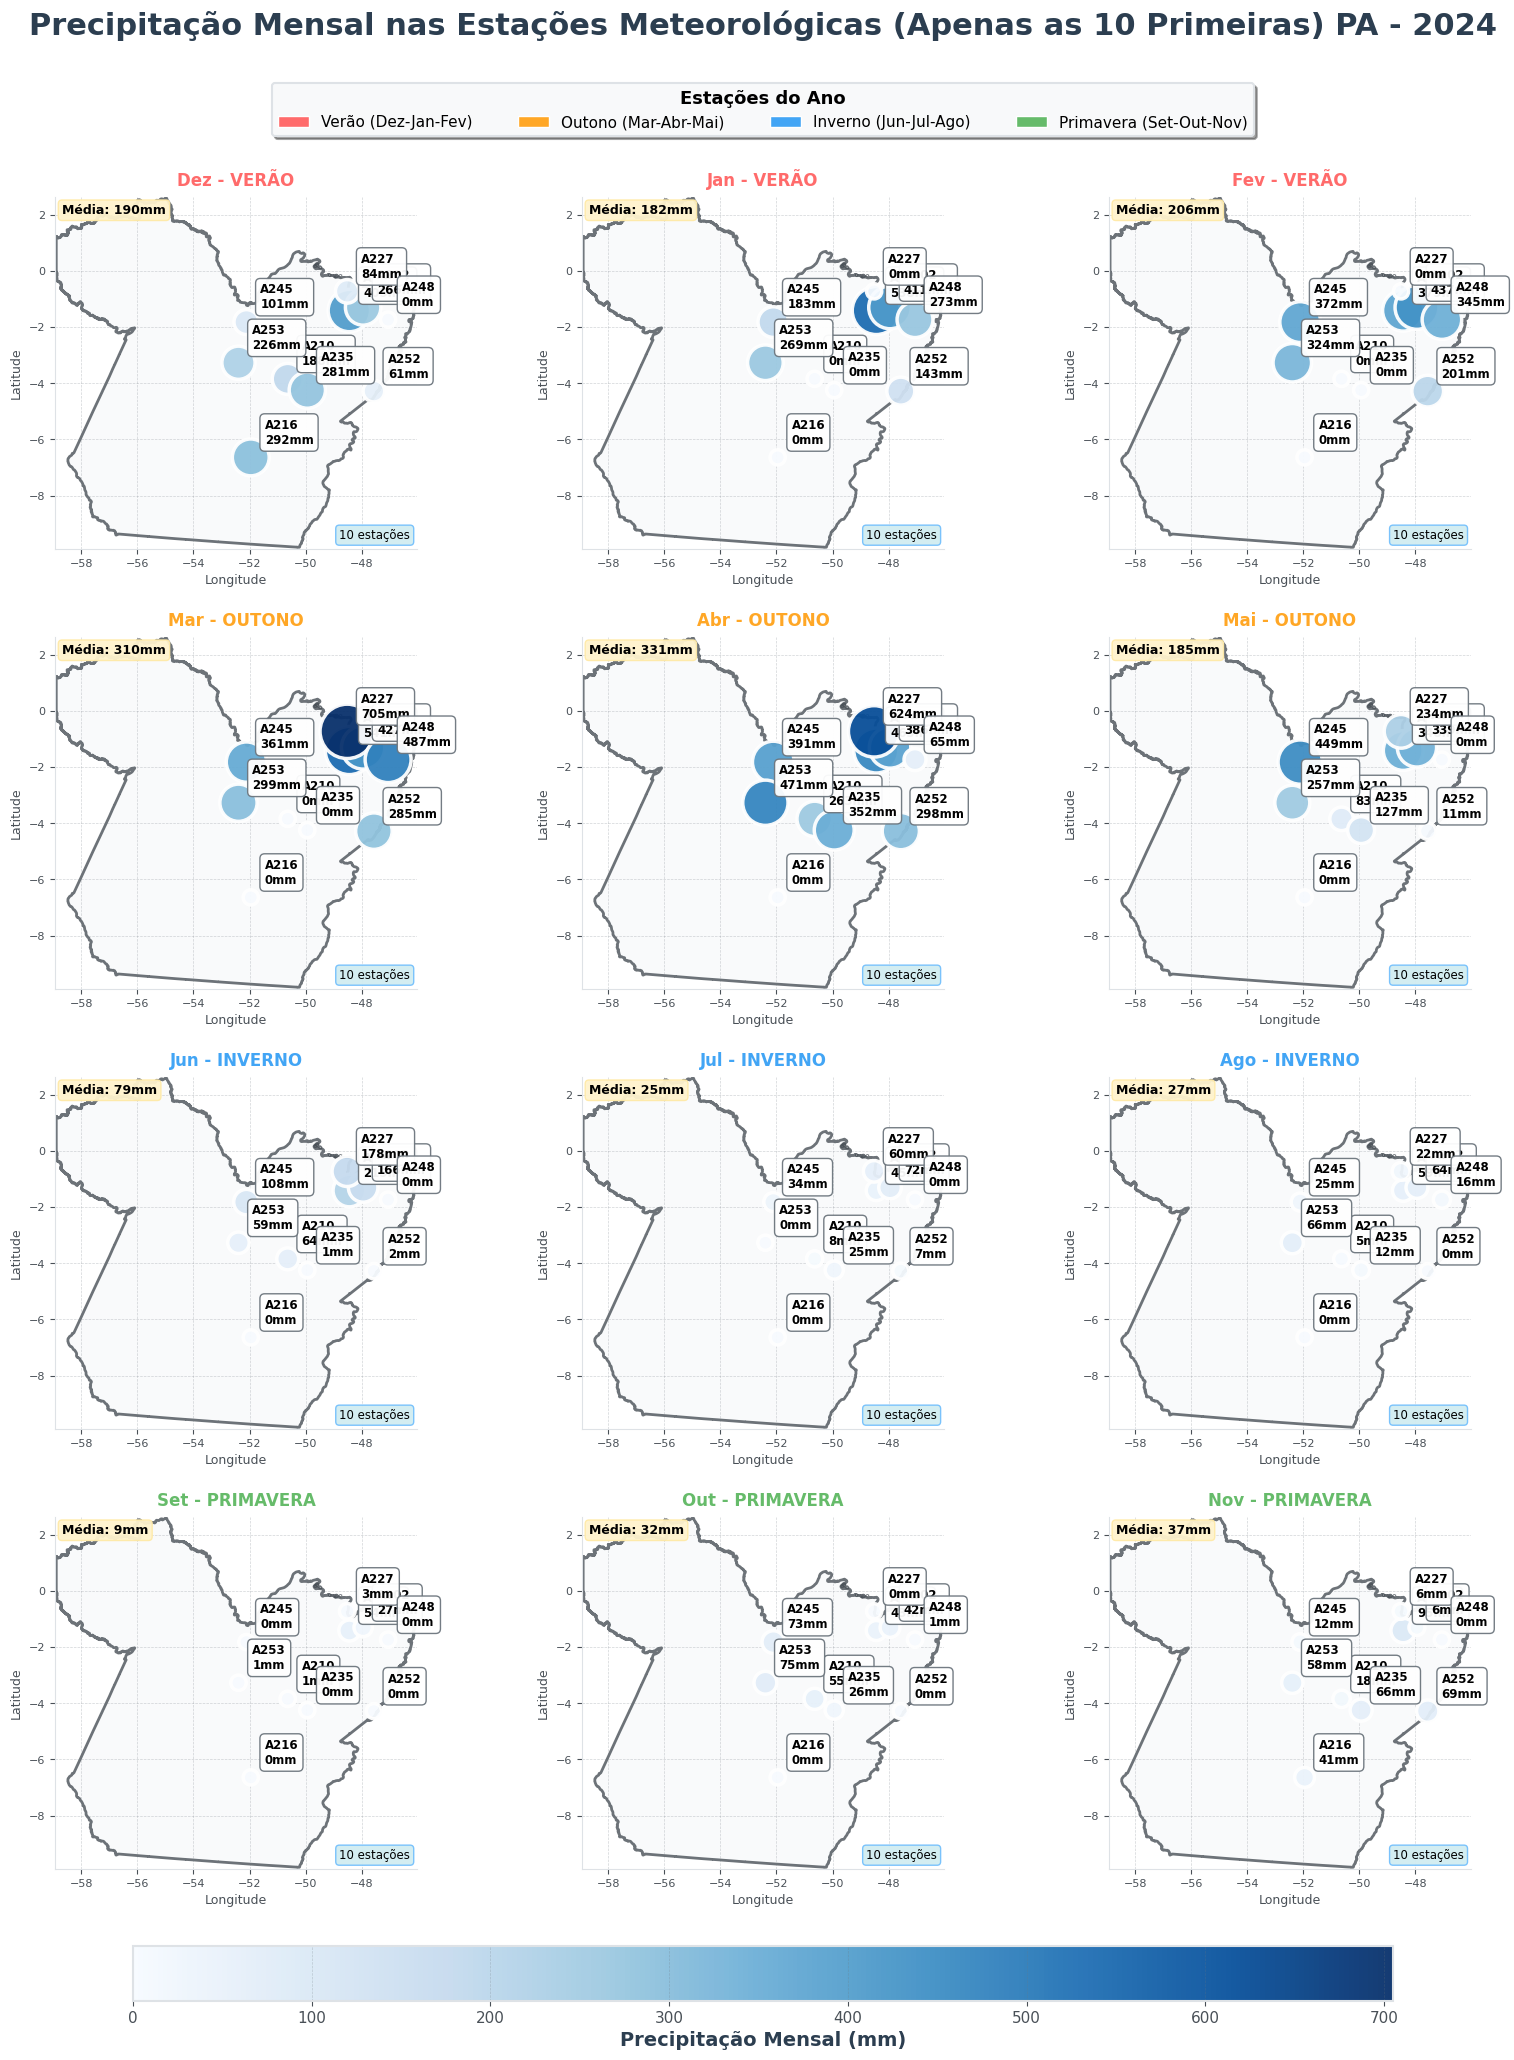


üìä ESTAT√çSTICAS RESUMIDAS:
   Esta√ß√£o A201 (A201): 3184mm/ano
   Esta√ß√£o A202 (A202): 2642mm/ano
   Esta√ß√£o A210 (A210): 686mm/ano
   Esta√ß√£o A216 (A216): 333mm/ano
   Esta√ß√£o A227 (A227): 1916mm/ano
   Esta√ß√£o A235 (A235): 891mm/ano
   Esta√ß√£o A245 (A245): 2108mm/ano
   Esta√ß√£o A248 (A248): 1188mm/ano
   Esta√ß√£o A252 (A252): 1077mm/ano
   Esta√ß√£o A253 (A253): 2105mm/ano

üìÖ M√âDIAS MENSAIS DO PA:
   Dez: 190mm
   Jan: 182mm
   Fev: 206mm
   Mar: 310mm
   Abr: 331mm
   Mai: 185mm
   Jun: 79mm
   Jul: 25mm
   Ago: 27mm
   Set: 9mm
   Out: 32mm
   Nov: 37mm

üå°Ô∏è M√âDIAS POR ESTA√á√ÉO DO ANO:
   Ver√£o: 193mm
   Outono: 276mm
   Inverno: 44mm
   Primavera: 26mm

‚úÖ Mapa de precipita√ß√£o mensal criado com sucesso!
üìç 10 esta√ß√µes plotadas
üóìÔ∏è 12 meses organizados por esta√ß√µes do ano
üíß Escala: 0 - 705mm


In [12]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import xarray as xr
import geobr

# Assumindo que voc√™ j√° tem o dataset carregado como 'combined_ds' ou similar
# combined_ds = seu dataset com m√∫ltiplas esta√ß√µes

# Extrair coordenadas das esta√ß√µes
latitudes = combined_ds.lat.values
longitudes = combined_ds.lon.values
wmo_codes = combined_ds.wmo_code.values

# Extrair nomes das esta√ß√µes dos atributos
station_names = []
for i in range(len(combined_ds.wmo_code)):
    # Tentar extrair informa√ß√µes reais se poss√≠vel
    try:
        # Se o dataset tem informa√ß√µes das esta√ß√µes
        if hasattr(combined_ds, 'attrs') and 'station' in combined_ds.attrs:
            station_name = f"Esta√ß√£o {wmo_codes[i]}"
        else:
            station_name = f"Esta√ß√£o {wmo_codes[i]}"
    except:
        station_name = f"Esta√ß√£o {wmo_codes[i]}"
    station_names.append(station_name)

print(f"üìç Encontradas {len(latitudes)} esta√ß√µes:")
for i, (lat, lon, wmo, name) in enumerate(zip(latitudes, longitudes, wmo_codes, station_names)):
    print(f"   {i+1}. {name} ({wmo}): {lat:.3f}¬∞S, {abs(lon):.3f}¬∞W")

# Verificar coordenadas das esta√ß√µes
print(f"\nüåç VERIFICA√á√ÉO DE COORDENADAS:")
print(f"   Latitudes: {latitudes.min():.3f} a {latitudes.max():.3f}")
print(f"   Longitudes: {longitudes.min():.3f} a {longitudes.max():.3f}")

# Verificar se as coordenadas est√£o dentro da UF
df_lat_range = (lat_min, lat_max)
df_lon_range = (lon_min, lat_max)

coordenadas_ok = True
for i, (lat, lon) in enumerate(zip(latitudes, longitudes)):
    if not (df_lat_range[0] <= lat <= df_lat_range[1]) or not (df_lon_range[0] <= lon <= df_lon_range[1]):
        print(f"   ‚ö†Ô∏è Esta√ß√£o {wmo_codes[i]} pode estar fora do DF: {lat:.3f}, {lon:.3f}")
        coordenadas_ok = False

if coordenadas_ok:
    print(f"   ‚úÖ Todas as esta√ß√µes est√£o dentro dos limites esperados")

# ===== CALCULAR PRECIPITA√á√ÉO MENSAL POR ESTA√á√ÉO =====
print("\nüíß Calculando precipita√ß√£o mensal...")

# Primeiro, vamos verificar a estrutura dos dados
print(f"   üîç Dimens√µes do dataset: {dict(combined_ds.dims)}")
print(f"   üìÖ Per√≠odo: {combined_ds.date.values[0]} a {combined_ds.date.values[-1]}")
print(f"   üè¢ Esta√ß√µes: {len(combined_ds.wmo_code)}")

# Calcular precipita√ß√£o di√°ria para cada esta√ß√£o
# Somar apenas a dimens√£o hour_utc, mantendo as outras dimens√µes
precip_diaria = combined_ds['PRECIPITA√á√ÉO TOTAL, HOR√ÅRIO (mm)'].sum(dim='hour_utc')

print(f"   üìä Dimens√µes precip_diaria: {precip_diaria.dims}")
print(f"   üìä Shape precip_diaria: {precip_diaria.shape}")

# Simplificar: somar todas as dimens√µes espaciais extras (lat, lon, alt)
# j√° que cada esta√ß√£o tem coordenadas √∫nicas
precip_diaria = precip_diaria.sum(dim=['region', 'uf', 'lat', 'lon', 'alt'])

print(f"   üìä Dimens√µes ap√≥s simplifica√ß√£o: {precip_diaria.dims}")
print(f"   üìä Shape ap√≥s simplifica√ß√£o: {precip_diaria.shape}")

# Agora devemos ter dimens√µes (wmo_code, date)
# Adicionar coordenada de m√™s
month_values = precip_diaria.date.dt.month.values
precip_diaria = precip_diaria.assign_coords(month=('date', month_values))

# Agrupar por m√™s para cada esta√ß√£o
precip_mensal = precip_diaria.groupby('month').sum()

print(f"   üìä Dimens√µes precip_mensal: {precip_mensal.dims}")
print(f"   üìä Shape precip_mensal: {precip_mensal.shape}")
print(f"   üìÖ Meses dispon√≠veis: {precip_mensal.month.values}")

# Converter para array numpy
# Agora devemos ter dimens√µes (month, wmo_code)
meses_completos = np.arange(1, 13)
n_stations = len(combined_ds.wmo_code)
precip_data = np.full((12, n_stations), np.nan)

print(f"   üîß Organizando dados para {n_stations} esta√ß√µes...")

for i, mes in enumerate(meses_completos):
    if mes in precip_mensal.month.values:
        # Encontrar o √≠ndice do m√™s
        mes_idx = np.where(precip_mensal.month.values == mes)[0][0]

        # Extrair dados do m√™s
        mes_data = precip_mensal.isel(month=mes_idx)

        # Se temos a dimens√£o wmo_code, extrair valores para cada esta√ß√£o
        if 'wmo_code' in mes_data.dims:
            precip_data[i, :] = mes_data.values
        else:
            # Caso tenha apenas um valor, replicar para todas as esta√ß√µes
            precip_data[i, :] = mes_data.values

print(f"   üìä Dados organizados: {precip_data.shape[0]} meses √ó {precip_data.shape[1]} esta√ß√µes")
print(f"   üíß Exemplo - Janeiro (m√™s 1): {precip_data[0, :]} mm")
print(f"   üíß Exemplo - Dezembro (m√™s 12): {precip_data[11, :]} mm")

# ===== CARREGAR SHAPEFILE DO DF =====
print("\nüó∫Ô∏è Carregando shapefile do PA...")
DF_shp = geobr.read_state(code_state='PA', year=2020).to_crs('epsg:4326')

# ===== DEFINIR ORDEM DOS MESES (VER√ÉO A OUTONO) =====
# Come√ßar com dezembro (ver√£o) e terminar com novembro (outono)
meses_ordem = [12, 1, 2,    # Ver√£o (Dez, Jan, Fev)
               3, 4, 5,     # Outono (Mar, Abr, Mai)
               6, 7, 8,     # Inverno (Jun, Jul, Ago)
               9, 10, 11]   # Primavera (Set, Out, Nov)

nomes_meses = ['Dez', 'Jan', 'Fev',
               'Mar', 'Abr', 'Mai',
               'Jun', 'Jul', 'Ago',
               'Set', 'Out', 'Nov']

estacoes_nomes = ['VER√ÉO', 'VER√ÉO', 'VER√ÉO',
                  'OUTONO', 'OUTONO', 'OUTONO',
                  'INVERNO', 'INVERNO', 'INVERNO',
                  'PRIMAVERA', 'PRIMAVERA', 'PRIMAVERA']

cores_estacoes = ['#FF6B6B', '#FF6B6B', '#FF6B6B',      # Ver√£o (vermelho)
                  '#FFA726', '#FFA726', '#FFA726',      # Outono (laranja)
                  '#42A5F5', '#42A5F5', '#42A5F5',      # Inverno (azul)
                  '#66BB6A', '#66BB6A', '#66BB6A']      # Primavera (verde)

# ===== CRIAR FIGURA COM SUBPLOTS MELHORADOS =====
print("\nüé® Criando mapa de precipita√ß√£o...")

# Configurar figura com espa√ßamento otimizado
fig = plt.figure(figsize=(18, 22))
fig.patch.set_facecolor('white')

# T√≠tulo principal
fig.suptitle('Precipita√ß√£o Mensal nas Esta√ß√µes Meteorol√≥gicas (Apenas as 10 Primeiras) PA - 2024',
             fontsize=22, fontweight='bold', y=0.965, color='#2C3E50')

# ===== CRIAR LEGENDA DAS ESTA√á√ïES CENTRALIZADA =====
from matplotlib.patches import Patch
legend_elements = [
    Patch(facecolor='#FF6B6B', label='Ver√£o (Dez-Jan-Fev)', edgecolor='white', linewidth=1),
    Patch(facecolor='#FFA726', label='Outono (Mar-Abr-Mai)', edgecolor='white', linewidth=1),
    Patch(facecolor='#42A5F5', label='Inverno (Jun-Jul-Ago)', edgecolor='white', linewidth=1),
    Patch(facecolor='#66BB6A', label='Primavera (Set-Out-Nov)', edgecolor='white', linewidth=1)
]

# Posicionar legenda horizontalmente centralizada abaixo do t√≠tulo
legend = fig.legend(handles=legend_elements,
                   loc='upper center',
                   bbox_to_anchor=(0.5, 0.935),
                   ncol=4,  # 4 colunas para disposi√ß√£o horizontal
                   fontsize=11,
                   title='Esta√ß√µes do Ano',
                   title_fontsize=13,
                   frameon=True,
                   fancybox=True,
                   shadow=True,
                   columnspacing=3)

legend.get_frame().set_facecolor('#F8F9FA')
legend.get_frame().set_edgecolor('#DEE2E6')
legend.get_frame().set_linewidth(1.5)
# Definir t√≠tulo em negrito manualmente
legend.get_title().set_fontweight('bold')

# ===== CRIAR GRID DE SUBPLOTS COM ESPA√áAMENTO REDUZIDO =====
# Ajustar √°rea para os subplots (deixar espa√ßo para t√≠tulo, legenda e colorbar)
gs = fig.add_gridspec(4, 3,
                      left=0.08, right=0.92,
                      top=0.88, bottom=0.12,  # Reduzir espa√ßo inferior para colorbar
                      hspace=0.25,  # Reduzir espa√ßamento vertical
                      wspace=0.15)  # Reduzir espa√ßamento horizontal

# Calcular limites globais para consist√™ncia das escalas
vmin = np.nanmin(precip_data)
vmax = np.nanmax(precip_data)

print(f"   üìä Escala de precipita√ß√£o: {vmin:.0f} - {vmax:.0f} mm")

# ===== PLOTAR CADA M√äS =====
for i, (mes_num, mes_nome, estacao_nome, cor_estacao) in enumerate(zip(meses_ordem, nomes_meses, estacoes_nomes, cores_estacoes)):
    # Calcular posi√ß√£o no grid
    row = i // 3
    col = i % 3
    ax = fig.add_subplot(gs[row, col])

    # Dados de precipita√ß√£o do m√™s (mes_num-1 porque array √© 0-indexado)
    mes_data = precip_data[mes_num-1, :]

    # Verificar se temos dados v√°lidos para este m√™s
    if np.all(np.isnan(mes_data)):
        print(f"‚ö†Ô∏è Sem dados para {mes_nome}")
        # Plotar shapefile vazio
        DF_shp.plot(ax=ax, color='lightgray', edgecolor='black', alpha=0.3)
        ax.set_title(f'{mes_nome} - {estacao_nome}\n(Sem dados)',
                    fontsize=12, fontweight='bold',
                    color=cor_estacao, pad=8)
        ax.set_xlabel('Longitude', fontsize=9)
        ax.set_ylabel('Latitude', fontsize=9)
        continue

    # PRIMEIRO: Determinar limites geogr√°ficos do DF e das esta√ß√µes
    df_bounds = DF_shp.bounds
    df_minx, df_miny, df_maxx, df_maxy = df_bounds.minx.min(), df_bounds.miny.min(), df_bounds.maxx.max(), df_bounds.maxy.max()

    # Limites das esta√ß√µes
    est_minx, est_maxx = longitudes.min(), longitudes.max()
    est_miny, est_maxy = latitudes.min(), latitudes.max()

    print(f"   üìç DF bounds: Lon[{df_minx:.3f}, {df_maxx:.3f}], Lat[{df_miny:.3f}, {df_maxy:.3f}]") if i == 0 else None
    print(f"   üìç Esta√ß√µes bounds: Lon[{est_minx:.3f}, {est_maxx:.3f}], Lat[{est_miny:.3f}, {est_maxy:.3f}]") if i == 0 else None

    # Usar limites que incluam tanto o DF quanto as esta√ß√µes
    plot_minx = min(df_minx, est_minx) - 0.05
    plot_maxx = max(df_maxx, est_maxx) + 0.05
    plot_miny = min(df_miny, est_miny) - 0.05
    plot_maxy = max(df_maxy, est_maxy) + 0.05

    # SEGUNDO: Plotar shapefile do DF com estilo melhorado
    DF_shp.plot(ax=ax, color='#F8F9FA', edgecolor='#495057', alpha=0.8, linewidth=2)

    # TERCEIRO: Criar scatter plot com tamanho proporcional √† precipita√ß√£o
    scatter = ax.scatter(longitudes, latitudes,
                        c=mes_data,
                        s=mes_data * 2 + 120,  # Tamanho otimizado
                        cmap='Blues',
                        vmin=vmin, vmax=vmax,
                        alpha=0.95,
                        edgecolors='white',
                        linewidth=2.5,
                        zorder=5)

    # QUARTO: Adicionar r√≥tulos das esta√ß√µes com estilo melhorado
    for j, (lon, lat, wmo, precip) in enumerate(zip(longitudes, latitudes, wmo_codes, mes_data)):
        if not np.isnan(precip):
            ax.annotate(f'{wmo}\n{precip:.0f}mm',
                       (lon, lat),
                       xytext=(10, 10),
                       textcoords='offset points',
                       fontsize=8.5,
                       ha='left',
                       fontweight='bold',
                       bbox=dict(boxstyle='round,pad=0.4',
                                facecolor='white',
                                alpha=0.95,
                                edgecolor='#6C757D',
                                linewidth=1),
                       zorder=6)

    # QUINTO: Personalizar subplot com estilo melhorado
    ax.set_title(f'{mes_nome} - {estacao_nome}',
                fontsize=12, fontweight='bold',
                color=cor_estacao, pad=8)

    ax.set_xlabel('Longitude', fontsize=9, color='#495057')
    ax.set_ylabel('Latitude', fontsize=9, color='#495057')

    # SEXTO: Ajustar limites para mostrar tanto DF quanto esta√ß√µes
    ax.set_xlim(plot_minx, plot_maxx)
    ax.set_ylim(plot_miny, plot_maxy)

    # S√âTIMO: Grid suave e estilizado
    ax.grid(True, alpha=0.3, color='#6C757D', linestyle='--', linewidth=0.5, zorder=1)

    # OITAVO: Estat√≠sticas do m√™s com estilo melhorado
    precip_valida = mes_data[~np.isnan(mes_data)]
    if len(precip_valida) > 0:
        media_mes = np.mean(precip_valida)
        ax.text(0.02, 0.98, f'M√©dia: {media_mes:.0f}mm',
               transform=ax.transAxes,
               bbox=dict(boxstyle='round,pad=0.3',
                        facecolor='#FFF3CD',
                        edgecolor='#FFEAA7',
                        alpha=0.95),
               fontsize=9, ha='left', va='top', fontweight='bold',
               zorder=7)

    # Adicionar informa√ß√£o sobre n√∫mero de esta√ß√µes
    ax.text(0.98, 0.02, f'{len(precip_valida)} esta√ß√µes',
           transform=ax.transAxes,
           bbox=dict(boxstyle='round,pad=0.3',
                    facecolor='#D1ECF1',
                    edgecolor='#74C0FC',
                    alpha=0.95),
           fontsize=8.5, ha='right', va='bottom',
           zorder=7)

    # Estilizar os eixos
    ax.tick_params(axis='both', which='major', labelsize=8, colors='#495057')
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['bottom'].set_color('#DEE2E6')
    ax.spines['left'].set_color('#DEE2E6')

# ===== ADICIONAR COLORBAR GLOBAL MELHORADA =====
# Criar colorbar na parte inferior com posicionamento otimizado
cbar_ax = fig.add_axes([0.15, 0.06, 0.7, 0.025])  # Posi√ß√£o mais pr√≥xima dos subplots
cbar = fig.colorbar(scatter, cax=cbar_ax, orientation='horizontal')
cbar.set_label('Precipita√ß√£o Mensal (mm)', fontsize=14, fontweight='bold', color='#2C3E50')

# Estilizar colorbar
cbar.ax.tick_params(labelsize=11, colors='#495057')
cbar.outline.set_edgecolor('#DEE2E6')
cbar.outline.set_linewidth(1.5)

# Adicionar grid na colorbar
cbar.ax.grid(True, alpha=0.3, color='#6C757D', linestyle='--', linewidth=0.5)

plt.show()

# ===== ESTAT√çSTICAS RESUMIDAS =====
print(f"\nüìä ESTAT√çSTICAS RESUMIDAS:")

# Calcular totais por esta√ß√£o
for i, (wmo, name) in enumerate(zip(wmo_codes, station_names)):
    precip_anual = np.nansum(precip_data[:, i])
    print(f"   {name} ({wmo}): {precip_anual:.0f}mm/ano")

# Calcular m√©dias mensais
print(f"\nüìÖ M√âDIAS MENSAIS DO PA:")
for mes_num, mes_nome in zip(meses_ordem, nomes_meses):
    mes_data = precip_data[mes_num-1, :]
    precip_valida = mes_data[~np.isnan(mes_data)]
    if len(precip_valida) > 0:
        media_mes = np.mean(precip_valida)
        print(f"   {mes_nome}: {media_mes:.0f}mm")

# Identificar padr√µes sazonais
estacoes_data = {
    'Ver√£o': np.nanmean([precip_data[11, :], precip_data[0, :], precip_data[1, :]]),
    'Outono': np.nanmean([precip_data[2, :], precip_data[3, :], precip_data[4, :]]),
    'Inverno': np.nanmean([precip_data[5, :], precip_data[6, :], precip_data[7, :]]),
    'Primavera': np.nanmean([precip_data[8, :], precip_data[9, :], precip_data[10, :]])
}

print(f"\nüå°Ô∏è M√âDIAS POR ESTA√á√ÉO DO ANO:")
for estacao, valor in estacoes_data.items():
    print(f"   {estacao}: {valor:.0f}mm")

print(f"\n‚úÖ Mapa de precipita√ß√£o mensal criado com sucesso!")
print(f"üìç {len(latitudes)} esta√ß√µes plotadas")
print(f"üóìÔ∏è 12 meses organizados por esta√ß√µes do ano")
print(f"üíß Escala: {vmin:.0f} - {vmax:.0f}mm")